# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [5]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!pip install matplotlib

In [11]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [63]:
# Try loading one file

df = pd.read_parquet(r"C:\Users\DELL PC\Desktop\Upgrad\ML and AI\Course 2 - Data Visualisation using Python\M7 - EDA Assignment\Datasets and Dictionary\trip_records\2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [64]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [65]:
df.shape

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [76]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [77]:
# from google.colab import drive
# drive.mount('/content/drive')

In [79]:
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day'] = df['tpep_pickup_datetime'].dt.day
df['hour'] = df['tpep_pickup_datetime'].dt.hour

In [82]:
df.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3066761         2  2023-01-31 23:58:34   2023-02-01 00:12:33              NaN   
3066762         2  2023-01-31 23:31:09   2023-01-31 23:50:36              NaN   
3066763         2  2023-01-31 23:01:05   2023-01-31 23:25:36              NaN   
3066764         2  2023-01-31 23:40:00   2023-01-31 23:53:00              NaN   
3066765         2  2023-01-31 23:07:32   2023-01-31 23:21:56              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3066761           3.05         NaN               None           107   
3066762           5.80         NaN               None           112   
3066763           4.67         NaN               None           114   
3066764           3.15         NaN               None           230   
3066765           2.85         NaN               None           262   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
3066761            48             0  ...      0.5        3.96           0.0   
3066762            75             0  ...      0.5        2.64           0.0   
3066763           239             0  ...      0.5        5.32           0.0   
3066764            79             0  ...      0.5        4.43           0.0   
3066765           143             0  ...      0.5        2.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
3066761                    1.0         23.76                   NaN   
3066762                    1.0         29.07                   NaN   
3066763                    1.0         26.93                   NaN   
3066764                    1.0         26.58                   NaN   
3066765                    1.0         21.97                   NaN   

         airport_fee  month  day  hour  
3066761          NaN      1   31    23  
3066762          NaN      1   31    23  
3066763          NaN      1   31    23  
3066764          NaN      1   31    23  
3066765          NaN      1   31    23  

[5 rows x 22 columns]

In [94]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\DELL PC\Desktop\Upgrad\ML and AI\Course 2 - Data Visualisation using Python\M7 - EDA Assignment\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()
# print(file_list)
# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # print(file_path)
        # Reading the current file
        df_month = pd.read_parquet(file_path)
        # print(df_month)
        df_month['month'] = df_month['tpep_pickup_datetime'].dt.month
        df_month['day'] = df_month['tpep_pickup_datetime'].dt.day
        df_month['hour'] = df_month['tpep_pickup_datetime'].dt.hour
        # print(df_month)
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for day in sorted(df_month['day'].unique()):
            for hour in range(0, 24):
            # Iterate through each hour of the selected date
                hour_data = df_month[(df_month['day'] == day) & (df_month['hour'] == hour)]
        
        
                # Sample 0.8% of the hourly data randomly
                sample = hour_data.sample(frac= 0.008, random_state=23)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample], ignore_index= True)
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index= True)
        print(f'{file_name} sampled succesfully')

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

2023-1.parquet sampled succesfully
2023-10.parquet sampled succesfully
2023-11.parquet sampled succesfully
2023-12.parquet sampled succesfully
2023-2.parquet sampled succesfully
2023-3.parquet sampled succesfully
2023-4.parquet sampled succesfully
2023-5.parquet sampled succesfully
2023-6.parquet sampled succesfully
2023-7.parquet sampled succesfully
2023-8.parquet sampled succesfully
2023-9.parquet sampled succesfully


In [96]:
df.shape

(303401, 23)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [99]:
df.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
303396         1  2023-09-30 23:46:24   2023-10-01 00:11:47              1.0   
303397         2  2023-09-30 23:48:11   2023-10-01 00:16:55              1.0   
303398         2  2023-09-30 23:39:20   2023-10-01 00:13:00              1.0   
303399         2  2023-09-30 23:25:33   2023-09-30 23:34:00              1.0   
303400         2  2023-09-30 23:48:54   2023-09-30 23:56:51              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
303396           3.30         1.0                  N           249   
303397           5.54         1.0                  N            68   
303398          16.22         2.0                  N           132   
303399           1.60         1.0                  N           137   
303400           1.59         1.0                  N           142   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
303396           255             1  ...        5.00          0.00   
303397           202             1  ...        6.78          0.00   
303398           170             1  ...       16.19          6.94   
303399           141             1  ...        3.00          0.00   
303400           233             1  ...        3.75          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
303396                    1.0         34.70                   2.5   
303397                    1.0         40.68                   2.5   
303398                    1.0         98.88                   2.5   
303399                    1.0         18.00                   2.5   
303400                    1.0         18.75                   2.5   

        airport_fee  month  day  hour  Airport_fee  
303396          NaN      9   30    23         0.00  
303397          NaN      9   30    23         0.00  
303398          NaN      9   30    23         1.75  
303399          NaN      9   30    23         0.00  
303400          NaN      9   30    23         0.00  

[5 rows x 23 columns]

In [101]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('new-york_taxidata_sampled.parquet')
df.to_csv('new-york_taxidata_sampled.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [2410]:
# Load the new data file

df = pd.read_csv('new-york_taxidata_sampled.csv')

In [2412]:
df.tail()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
303396      303396         1  2023-09-30 23:46:24   2023-10-01 00:11:47   
303397      303397         2  2023-09-30 23:48:11   2023-10-01 00:16:55   
303398      303398         2  2023-09-30 23:39:20   2023-10-01 00:13:00   
303399      303399         2  2023-09-30 23:25:33   2023-09-30 23:34:00   
303400      303400         2  2023-09-30 23:48:54   2023-09-30 23:56:51   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
303396              1.0           3.30         1.0                  N   
303397              1.0           5.54         1.0                  N   
303398              1.0          16.22         2.0                  N   
303399              1.0           1.60         1.0                  N   
303400              1.0           1.59         1.0                  N   

        PULocationID  DOLocationID  ...  tip_amount  tolls_amount  \
303396           249           255  ...        5.00          0.00   
303397            68           202  ...        6.78          0.00   
303398           132           170  ...       16.19          6.94   
303399           137           141  ...        3.00          0.00   
303400           142           233  ...        3.75          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
303396                    1.0         34.70                   2.5   
303397                    1.0         40.68                   2.5   
303398                    1.0         98.88                   2.5   
303399                    1.0         18.00                   2.5   
303400                    1.0         18.75                   2.5   

        airport_fee  month  day  hour  Airport_fee  
303396          NaN      9   30    23         0.00  
303397          NaN      9   30    23         0.00  
303398          NaN      9   30    23         1.75  
303399          NaN      9   30    23         0.00  
303400          NaN      9   30    23         0.00  

[5 rows x 24 columns]

In [2414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303401 entries, 0 to 303400
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             303401 non-null  int64  
 1   VendorID               303401 non-null  int64  
 2   tpep_pickup_datetime   303401 non-null  object 
 3   tpep_dropoff_datetime  303401 non-null  object 
 4   passenger_count        293637 non-null  float64
 5   trip_distance          303401 non-null  float64
 6   RatecodeID             293637 non-null  float64
 7   store_and_fwd_flag     293637 non-null  object 
 8   PULocationID           303401 non-null  int64  
 9   DOLocationID           303401 non-null  int64  
 10  payment_type           303401 non-null  int64  
 11  fare_amount            303401 non-null  float64
 12  extra                  303401 non-null  float64
 13  mta_tax                303401 non-null  float64
 14  tip_amount             303401 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [2418]:
# Fix the index and drop any columns that are not needed
df.drop(['Unnamed: 0', 'store_and_fwd_flag', 'month', 'day', 'hour'], axis = 1, inplace= True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [2421]:
# Combine the two airport fee columns
print(df['airport_fee'].value_counts(dropna = False))
print(f'\n{df['Airport_fee'].value_counts(dropna = False)}')

airport_fee
 NaN     279575
 0.00     21737
 1.25      2088
-1.25         1
Name: count, dtype: int64

Airport_fee
 0.00    246052
 NaN      33590
 1.75     19482
 1.25      4275
-1.75         1
-1.25         1
Name: count, dtype: int64


In [2423]:
df[['airport_fee', 'Airport_fee']]

airport_fee  Airport_fee
0               0.0          NaN
1               0.0          NaN
2               0.0          NaN
3               0.0          NaN
4               0.0          NaN
...             ...          ...
303396          NaN         0.00
303397          NaN         0.00
303398          NaN         1.75
303399          NaN         0.00
303400          NaN         0.00

[303401 rows x 2 columns]

In [2425]:
comparison = df['Airport_fee'][df['airport_fee'].isna() == True]
comparison.value_counts()
print(f'{df['Airport_fee'].value_counts().sum()} & {comparison.value_counts().sum()}')

269811 & 269811


In [2427]:
# All the values of 'Airport_fee' are avalible in the rows where 'airport_fee' is NaN.
# So We can combine the two together

In [2429]:
df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])

In [2431]:
df.drop('Airport_fee', axis=1, inplace= True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [2434]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [2436]:
# check where values of fare amount are negative

# monetary_columns = ['fare_amount','extra', 'tolls_amount', 'mta_tax', 'tip_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
# for column in monetary_columns:
#     print(df[df[column] < 0])

df[df['fare_amount'] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [2438]:
df[df['total_amount'] < 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
8949           2  2023-01-13 06:19:23   2023-01-13 06:19:27              1.0   
10161          2  2023-01-14 14:36:18   2023-01-14 14:36:37              1.0   
51883          2  2023-10-31 16:52:40   2023-10-31 17:07:19              1.0   
109802         2  2023-03-06 07:57:11   2023-03-06 08:29:48              2.0   
142410         2  2023-06-12 10:09:26   2023-06-12 10:44:52              3.0   
144121         2  2023-06-14 08:26:48   2023-06-14 08:27:28              1.0   
183791         2  2023-02-04 13:23:51   2023-02-04 13:46:55              1.0   
185927         2  2023-02-07 12:39:19   2023-02-07 13:04:15              1.0   
241842         2  2023-05-13 19:23:45   2023-05-13 19:36:04              2.0   
285889         2  2023-09-07 19:51:49   2023-09-07 20:23:58              6.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
8949             0.00         1.0           132           132             2   
10161            0.01         1.0            70            70             2   
51883            2.57         1.0           233           237             2   
109802          15.69         1.0           261           138             2   
142410           8.98         1.0           138           186             2   
144121           0.09         1.0           263           263             2   
183791           0.00         1.0           138           234             2   
185927           9.85         1.0            43           138             2   
241842           0.33         1.0           186           186             2   
285889           3.87         1.0           236           224             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
8949            0.0    0.0     -0.5         0.0           0.0   
10161           0.0    0.0     -0.5         0.0           0.0   
51883           0.0    0.0     -0.5         0.0           0.0   
109802          0.0    0.0     -0.5         0.0           0.0   
142410          0.0    0.0     -0.5         0.0           0.0   
144121          0.0    0.0     -0.5         0.0           0.0   
183791          0.0    0.0     -0.5         0.0           0.0   
185927          0.0    0.0     -0.5         0.0           0.0   
241842          0.0    0.0     -0.5         0.0           0.0   
285889          0.0    0.0     -0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
8949                     -1.0         -2.75                   0.0        -1.25  
10161                    -1.0         -1.50                   0.0         0.00  
51883                    -1.0         -4.00                  -2.5         0.00  
109802                   -1.0         -4.00                  -2.5         0.00  
142410                   -1.0         -5.75                  -2.5        -1.75  
144121                   -1.0         -4.00                  -2.5         0.00  
183791                   -1.0         -5.25                  -2.5        -1.25  
185927                   -1.0         -4.00                  -2.5         0.00  
241842                   -1.0         -4.00                  -2.5         0.00  
285889                   -1.0         -4.00                  -2.5         0.00

Did you notice something different in the `RatecodeID` column for above records?

In [2441]:
# Analyse RatecodeID for the negative fare amounts

print(f'{df['RatecodeID'][df['total_amount'] < 0].value_counts(dropna= False)}\n')
print(df['RatecodeID'].value_counts(dropna= False))

RatecodeID
1.0    10
Name: count, dtype: int64

RatecodeID
1.0     276900
2.0      11630
NaN       9764
99.0      1799
5.0       1732
3.0       1003
4.0        573
Name: count, dtype: int64


In [2443]:
# As mentioned in Data Dictionary 'RatecodeID' lies in range 1-6

# Replace 'RatecodeID' 99.0 with median value
df['RatecodeID'] = df['RatecodeID'].apply(lambda x: 1.0 if x == 99.0 else x)
df['RatecodeID'].value_counts(dropna= False)

RatecodeID
1.0    278699
2.0     11630
NaN      9764
5.0      1732
3.0      1003
4.0       573
Name: count, dtype: int64

In [2445]:
# Find which columns have negative values

monetary_columns = ['fare_amount','extra', 'tolls_amount', 'mta_tax', 'tip_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
for column in monetary_columns:
    print(f'Checking for column : {column}')
    if len(df[df[column] < 0]) == 0:
        print('No negative values found\n')
    else:
        print(f'Number of negative values: {df[df[column] < 0].shape[0]}\n')


Checking for column : fare_amount
No negative values found

Checking for column : extra
No negative values found

Checking for column : tolls_amount
No negative values found

Checking for column : mta_tax
Number of negative values: 10

Checking for column : tip_amount
No negative values found

Checking for column : improvement_surcharge
Number of negative values: 10

Checking for column : total_amount
Number of negative values: 10

Checking for column : congestion_surcharge
Number of negative values: 8

Checking for column : airport_fee
Number of negative values: 3



In [2447]:
# fix these negative values

# After checking all monetary columns we find there are 10 samples with negative total amounts
# we will drop them
df = df[~(df['total_amount'] < 0)]

In [2449]:
# checking monetary columns again
for column in monetary_columns:
    print(f'Checking for column : {column}')
    if len(df[df[column] < 0]) == 0:
        print('No negative values found\n')
    else:
        print(f'Number of negative values: {df[df[column] < 0].shape[0]}\n')

Checking for column : fare_amount
No negative values found

Checking for column : extra
No negative values found

Checking for column : tolls_amount
No negative values found

Checking for column : mta_tax
No negative values found

Checking for column : tip_amount
No negative values found

Checking for column : improvement_surcharge
No negative values found

Checking for column : total_amount
No negative values found

Checking for column : congestion_surcharge
No negative values found

Checking for column : airport_fee
No negative values found



### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [2453]:
# Find the proportion of missing values in each column

print(f'Percentage of missing values in each column\n\n{df.isna().sum()/len(df)*100}')

Percentage of missing values in each column

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.218289
trip_distance            0.000000
RatecodeID               3.218289
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.218289
airport_fee              3.218289
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [2456]:
# Display the rows with null values
display(df[df['passenger_count'].isna()])
# Impute NaN values in 'passenger_count'
df['passenger_count'].value_counts(dropna= False)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
9              2  2023-01-01 00:52:00   2023-01-01 01:18:51              NaN   
16             2  2023-01-01 00:42:00   2023-01-01 01:04:00              NaN   
17             2  2023-01-01 00:58:00   2023-01-01 01:29:00              NaN   
22             2  2023-01-01 00:49:00   2023-01-01 01:08:00              NaN   
25             2  2023-01-01 00:33:00   2023-01-01 00:35:00              NaN   
...          ...                  ...                   ...              ...   
303186         1  2023-09-30 19:59:51   2023-09-30 20:08:44              NaN   
303193         1  2023-09-30 19:02:15   2023-09-30 19:08:51              NaN   
303296         1  2023-09-30 22:56:34   2023-09-30 23:14:40              NaN   
303312         1  2023-09-30 22:37:22   2023-09-30 22:50:41              NaN   
303332         1  2023-09-30 22:57:31   2023-09-30 23:16:38              NaN   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
9                4.16         NaN            50           211             0   
16               3.39         NaN           161           144             0   
17               8.91         NaN            87           238             0   
22               4.18         NaN           164           238             0   
25               0.00         NaN            79            79             0   
...               ...         ...           ...           ...           ...   
303186           0.00         NaN           234           113             0   
303193           0.00         NaN            74            41             0   
303296           0.00         NaN           157            49             0   
303312           0.00         NaN           112           157             0   
303332           3.30         NaN            40           188             0   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
9             25.26    0.0      0.5        5.85           0.0   
16            22.72    0.0      0.5        1.00           0.0   
17            42.45    0.0      0.5        9.29           0.0   
22            24.78    0.0      0.5        5.76           0.0   
25            14.74    0.0      0.5        3.37           0.0   
...             ...    ...      ...         ...           ...   
303186        23.16    0.0      0.5        0.00           0.0   
303193         8.79    0.0      0.5        0.00           0.0   
303296        18.64    0.0      0.5        0.00           0.0   
303312        21.00    0.0      0.5        0.00           0.0   
303332        19.48    0.0      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
9                         1.0         35.11                   NaN          NaN  
16                        1.0         27.72                   NaN          NaN  
17                        1.0         55.74                   NaN          NaN  
22                        1.0         34.54                   NaN          NaN  
25                        1.0         22.11                   NaN          NaN  
...                       ...           ...                   ...          ...  
303186                    1.0         27.16                   NaN          NaN  
303193                    1.0         10.29                   NaN          NaN  
303296                    1.0         20.14                   NaN          NaN  
303312                    1.0         22.50                   NaN          NaN  
303332                    1.0         20.98                   NaN          NaN  

[9764 rows x 18 columns]

passenger_count
1.0    221308
2.0     44122
3.0     10931
NaN      9764
4.0      6176
0.0      4664
5.0      3792
6.0      2630
8.0         2
7.0         1
9.0         1
Name: count, dtype: int64

In [2458]:
# We will replace NaN values in 'passenger_count' with median value
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())
df['passenger_count'].value_counts(dropna= False)

passenger_count
1.0    231072
2.0     44122
3.0     10931
4.0      6176
0.0      4664
5.0      3792
6.0      2630
8.0         2
7.0         1
9.0         1
Name: count, dtype: int64

Did you find zeroes in passenger_count? Handle these.

In [2461]:
# checking data points with 'passenger_count' as 0
df[df['passenger_count'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
66             1  2023-01-01 01:46:10   2023-01-01 01:55:58              0.0   
91             1  2023-01-01 02:17:07   2023-01-01 02:35:35              0.0   
112            1  2023-01-01 02:38:18   2023-01-01 02:49:11              0.0   
135            1  2023-01-01 03:19:25   2023-01-01 03:46:56              0.0   
233            1  2023-01-01 10:17:40   2023-01-01 10:31:01              0.0   
...          ...                  ...                   ...              ...   
302901         1  2023-09-30 14:24:14   2023-09-30 15:00:59              0.0   
302977         1  2023-09-30 16:11:33   2023-09-30 16:16:42              0.0   
303019         1  2023-09-30 17:33:21   2023-09-30 17:39:19              0.0   
303031         1  2023-09-30 17:24:43   2023-09-30 17:36:09              0.0   
303383         1  2023-09-30 23:17:12   2023-09-30 23:26:47              0.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
66                1.6         1.0           237           162             1   
91                6.8         1.0           151             4             1   
112               4.0         1.0             4           141             1   
135               9.9         1.0           231           198             1   
233               1.4         1.0           107           237             1   
...               ...         ...           ...           ...           ...   
302901            5.4         1.0           125           236             2   
302977            1.2         1.0           140           264             1   
303019            1.2         1.0           142           239             1   
303031            0.9         1.0           142           161             1   
303383            1.4         1.0            68            48             1   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
66             12.1    3.5      0.5        3.40           0.0   
91             28.2    3.5      0.5        6.60           0.0   
112            18.4    3.5      0.5        4.65           0.0   
135            42.2    3.5      0.5        9.40           0.0   
233            11.4    2.5      0.5        2.00           0.0   
...             ...    ...      ...         ...           ...   
302901         35.2    2.5      0.5        0.00           0.0   
302977          7.9    2.5      0.5        3.00           0.0   
303019          8.6    2.5      0.5        1.00           0.0   
303031          9.3    2.5      0.5        2.65           0.0   
303383         10.0    3.5      0.5        2.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
66                        1.0         20.50                   2.5          0.0  
91                        1.0         39.80                   2.5          0.0  
112                       1.0         28.05                   2.5          0.0  
135                       1.0         56.60                   2.5          0.0  
233                       1.0         17.40                   2.5          0.0  
...                       ...           ...                   ...          ...  
302901                    1.0         39.20                   2.5          0.0  
302977                    1.0         14.90                   2.5          0.0  
303019                    1.0         13.60                   2.5          0.0  
303031                    1.0         15.95                   2.5          0.0  
303383                    1.0         17.00                   2.5          0.0  

[4664 rows x 18 columns]

In [2463]:
# Replace 0 'passenger_count' with median since all other columns seem to have normal values
passenger_median = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].apply(lambda x: passenger_median if x == 0 else x)
df['passenger_count'].value_counts()

passenger_count
1.0    235736
2.0     44122
3.0     10931
4.0      6176
5.0      3792
6.0      2630
8.0         2
7.0         1
9.0         1
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [2466]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].median())
df['RatecodeID'].value_counts(dropna= False)

RatecodeID
1.0    288453
2.0     11630
5.0      1732
3.0      1003
4.0       573
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [2469]:
# handle null values in congestion_surcharge
print(f'Before handling null values: {df['congestion_surcharge'].value_counts(dropna= False)}')

# fill null values with median
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())

print(f'\nAfter handling null values: {df['congestion_surcharge'].value_counts(dropna= False)}')

Before handling null values: congestion_surcharge
2.5    271406
0.0     22221
NaN      9764
Name: count, dtype: int64

After handling null values: congestion_surcharge
2.5    281170
0.0     22221
Name: count, dtype: int64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [2472]:
# Handle any remaining missing values
df.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
airport_fee              9764
dtype: int64

In [2474]:
print(f'Before handling null values: {df['airport_fee'].value_counts(dropna= False)}')

df['airport_fee'] = df['airport_fee'].fillna(df['airport_fee'].median())

print(f'\nAfter handling null values: {df['airport_fee'].value_counts(dropna= False)}')

Before handling null values: airport_fee
0.00    267782
1.75     19482
NaN       9764
1.25      6363
Name: count, dtype: int64

After handling null values: airport_fee
0.00    277546
1.75     19482
1.25      6363
Name: count, dtype: int64


In [2476]:
# rechecking for null values in all columns
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [2480]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  303391.000000    303391.000000  303391.000000  303391.000000   
mean        1.736802         1.371989       3.580806       1.073446   
std         0.444838         0.867025      35.474464       0.393068   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         9.000000   13422.480000       5.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  303391.000000  303391.000000  303391.000000  303391.000000   
mean      165.496735     164.040268       1.165265      19.901923   
std        63.931727      69.848190       0.504332      18.378740   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     114.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      22.200000   
max       265.000000     265.000000       4.000000     822.000000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  303391.000000  303391.000000  303391.000000  303391.000000   
mean        1.578965       0.495137       3.560250       0.598261   
std         1.826100       0.049648       4.022215       2.178535   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.850000       0.000000   
75%         2.500000       0.500000       4.450000       0.000000   
max        14.250000       4.000000     100.000000      70.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          303391.000000  303391.000000         303391.000000   
mean                0.999138      28.982957              2.316895   
std                 0.027331      22.935750              0.651335   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.100000              2.500000   
75%                 1.000000      31.000000              2.500000   
max                 1.000000     830.940000              2.500000   

         airport_fee  
count  303391.000000  
mean        0.138591  
std         0.458497  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

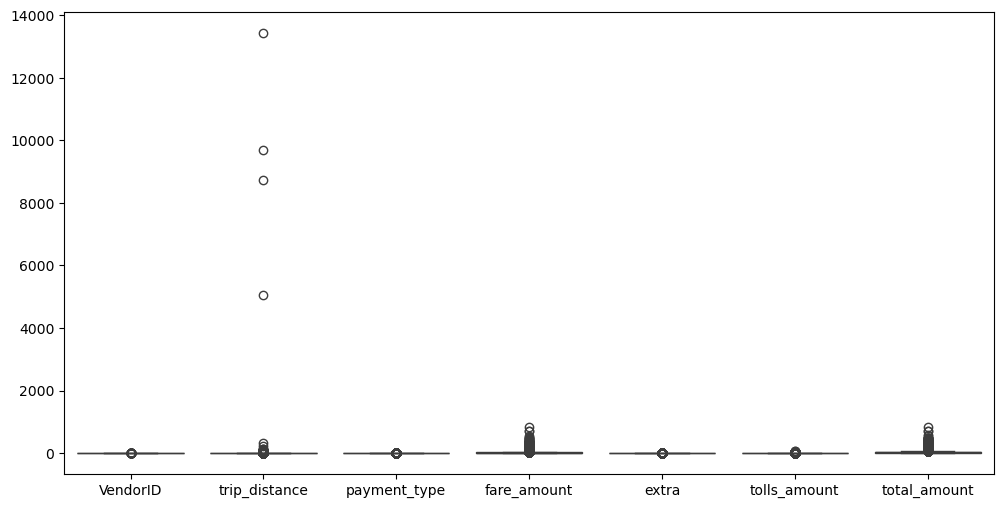

In [2482]:
plt.figure(figsize=(12,6))
sns.boxplot(df[['VendorID', 'trip_distance', 'payment_type', 'fare_amount', 'extra', 'tolls_amount', 'total_amount']])
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [2487]:
# remove passenger_count > 6
df = df[~(df['passenger_count'] > 6)]

In [2489]:
df[df['passenger_count'] > 6]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

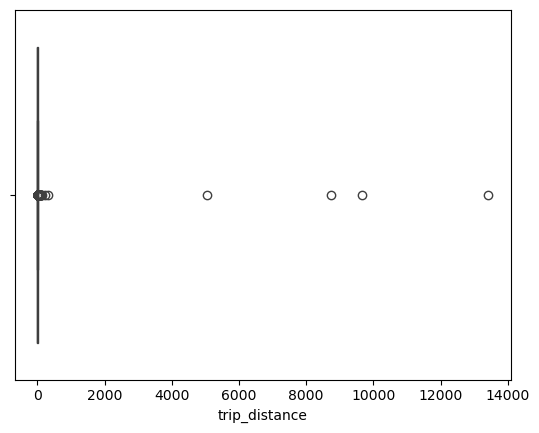

In [2491]:
# Continue with outlier handling

# handling outliers in trip_distance
sns.boxplot(x= df['trip_distance'])
plt.show()

In [2493]:
# remove trip_distance above 100 miles
df = df[~(df['trip_distance'] > 100)]

# remove trip_distance with distance of 0.0 miles
df = df[~(df['trip_distance'] == 0.0)]

# remove trips with distance less than 2 miles and fare amount above 75
df = df[~((df['trip_distance'] < 2) & (df['fare_amount'] > 75))]


In [2494]:
# remove entries with 'VendorID' other than 1 or 2 as they are not described in Data dictionary
df = df[df['VendorID'].isin([1,2])]


In [2497]:
# remove entries with 'payment_type' as 0 as it is not described in Data Dictionary
df = df[~(df['payment_type'] == 0)]

In [2499]:
# remove entries with 'tip_amount' > 0 where 'payment_type' is not credit card
df = df[~((df['tip_amount'] > 0) & (df['payment_type'] != 1))]

In [2501]:
# remove entries with 'tip_amount' greater than or equal to 50 percent of 'fare_amount'
df = df[~(df['tip_amount'] >= 0.5*df['fare_amount'])]

In [2503]:
# Do any columns need standardising?

# No

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [2506]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [2510]:
numerical = ['trip_distance', 'PULocationID', 'DOLocationID', 'pickup_hour', 'trip_duration', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee' ]
categorical = ['VendorID', 'passenger_count', 'RatecodeID', 'payment_type']

print('The Numerical Variables are as follows:')
for item in numerical:
    print(item)
print(f"\n{'-'*100}\n")

print('The Categorical variables are as follows:')
for item in categorical:
    print(item)
print(f"\n{'-'*100}\n")

print('The mentioned monetary parameters belong to the same category which is numerical\n')

The Numerical Variables are as follows:
trip_distance
PULocationID
DOLocationID
pickup_hour
trip_duration
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge
airport_fee

----------------------------------------------------------------------------------------------------

The Categorical variables are as follows:
VendorID
passenger_count
RatecodeID
payment_type

----------------------------------------------------------------------------------------------------

The mentioned monetary parameters belong to the same category which is numerical



##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [2514]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
df.reset_index(drop= True, inplace= True)


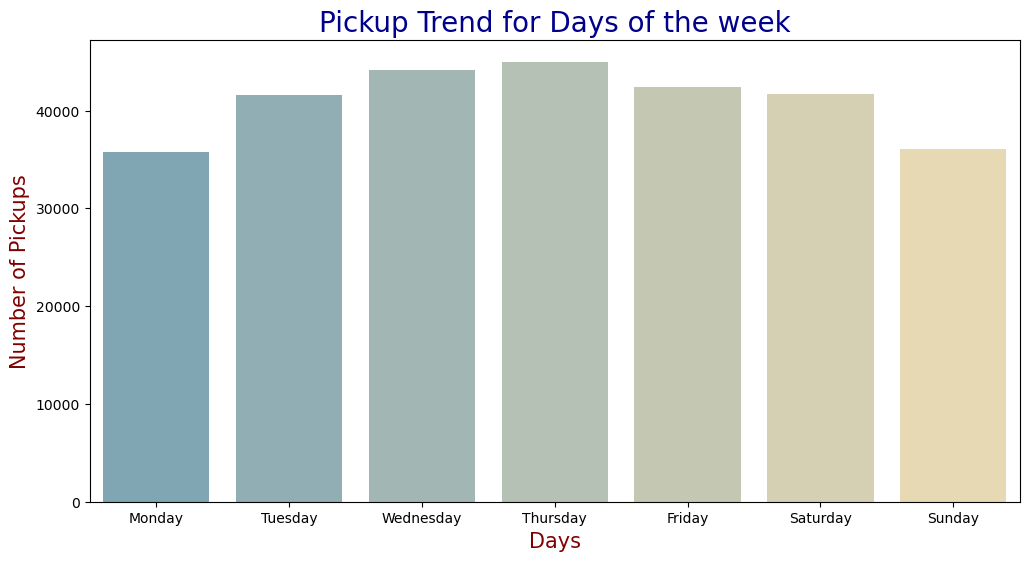

In [2518]:
# Find and show the daily trends in taxi pickups (days of the week)

# sns.color_palette('RdBu')
plt.figure(figsize= (12,6))
sns.countplot(x= df['pickup_day'], order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette= 'blend:#7AB,#EDA')

plt.title('Pickup Trend for Days of the week', fontdict= {'fontsize': 20, 'fontweight': 10, 'color': 'darkblue'} )
plt.xlabel('Days', fontdict= {'fontsize': 15, 'fontweight': 10, 'color': 'maroon'})
plt.ylabel('Number of Pickups', fontdict= {'fontsize': 15, 'fontweight': 10, 'color': 'maroon'})

plt.show()

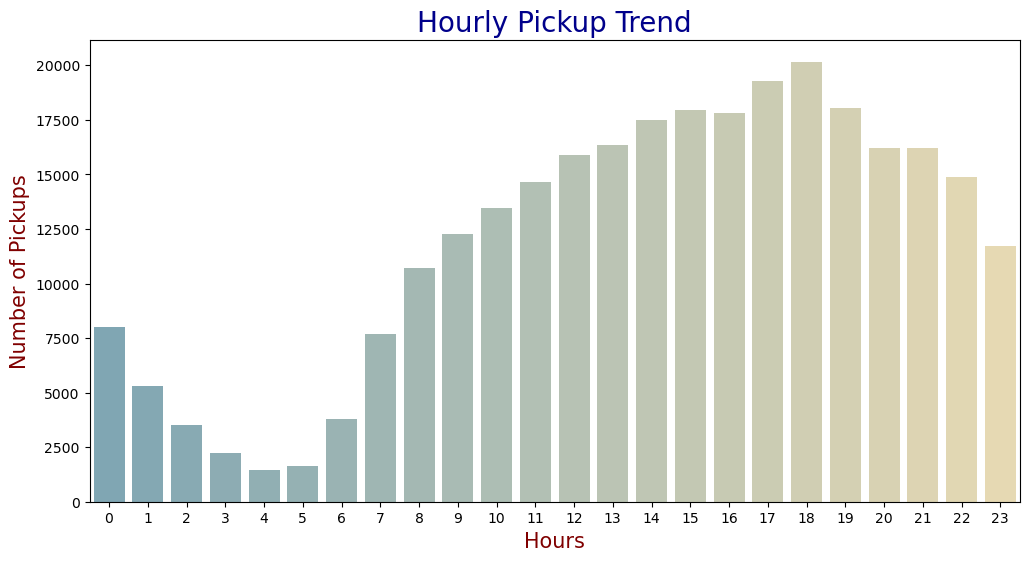

In [2520]:
# Find and show the hourly trends in taxi pickups

plt.figure(figsize= (12,6))
sns.countplot(x= df['pickup_hour'], palette= 'blend:#7AB,#EDA')

plt.title('Hourly Pickup Trend', fontdict= {'fontsize': 20, 'fontweight': 10, 'color': 'darkblue'} )
plt.xlabel('Hours', fontdict= {'fontsize': 15, 'fontweight': 10, 'color': 'maroon'})
plt.ylabel('Number of Pickups', fontdict= {'fontsize': 15, 'fontweight': 10, 'color': 'maroon'})

plt.show()

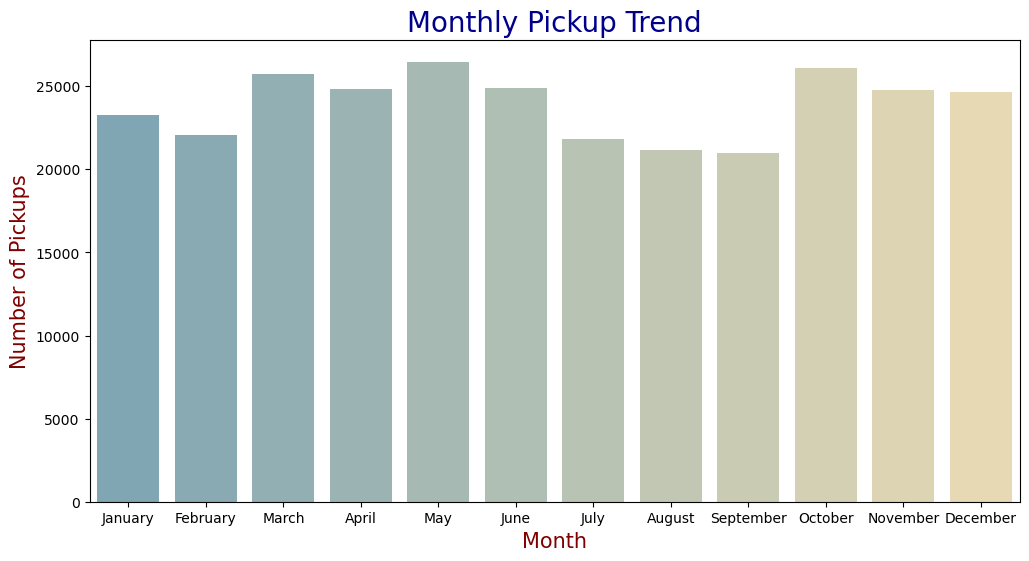

In [2522]:
# Show the monthly trends in pickups


plt.figure(figsize= (12,6))
sns.countplot(x= df['pickup_month'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette= 'blend:#7AB,#EDA')

plt.title('Monthly Pickup Trend', fontdict= {'fontsize': 20, 'fontweight': 10, 'color': 'darkblue'} )
plt.xlabel('Month', fontdict= {'fontsize': 15, 'fontweight': 10, 'color': 'maroon'})
plt.ylabel('Number of Pickups', fontdict= {'fontsize': 15, 'fontweight': 10, 'color': 'maroon'})

plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [2526]:
# Analyse the above parameters

df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe()

fare_amount     tip_amount   total_amount  trip_distance
count  286780.000000  286780.000000  286780.000000  286780.000000
mean       19.776853       3.556692      28.909205       3.527242
std        17.881635       3.881684      22.589470       4.573736
min         0.010000       0.000000       1.010000       0.010000
25%         9.300000       1.000000      16.000000       1.100000
50%        13.500000       2.860000      21.000000       1.810000
75%        21.900000       4.450000      30.720000       3.440000
max       542.000000      92.530000     564.050000      93.730000

In [2528]:
df[(df['fare_amount'] <= 0) | (df['total_amount'] <= 0) | (df['trip_distance'] <= 0)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_hour, pickup_month, pickup_day]
Index: []

[0 rows x 21 columns]

In [2530]:
df['tip_amount'][df['tip_amount'] <= 0].value_counts()

tip_amount
0.0    63293
Name: count, dtype: int64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [2535]:
# There are no data points with 'fare_amount', 'total_amount', 'trip_distance' as 0. They were handled in earlier section
# 'Tip_amount' as 0 seems like valid entry so we will not remove it

In [2537]:
# Create a df with non zero entries for the selected parameters.

df = df[~( (df['fare_amount'] <= 0) | (df['total_amount'] <= 0) | (df['trip_distance'] <= 0) )]
df.shape

(286780, 21)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [2540]:
# Group data by month and analyse monthly revenue

monthly_data = df.pivot_table(index = 'pickup_month', values = 'total_amount', aggfunc=['mean', 'median', 'count', 'sum'])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = monthly_data.reindex(month_order)

monthly_data.columns = ['Average Fare ($)', 'Median Fare ($)', 'Number of Trips', 'Total Revenue ($)']

display(monthly_data)

print(f"\n{'-'*50}\n")
print(f"Max Average Fare Month: {monthly_data['Average Fare ($)'].idxmax()}")
print(f"Min Average Fare Month: {monthly_data['Average Fare ($)'].idxmin()}")
print(f"\n{'-'*50}\n")
print(f"Max Median Fare Month: {monthly_data['Median Fare ($)'].idxmax()}")
print(f"Min Median Fare Month: {monthly_data['Median Fare ($)'].idxmin()}")
print(f"\n{'-'*50}\n")
print(f"Max Trips Month: {monthly_data['Number of Trips'].idxmax()}")
print(f"Min Trips Month: {monthly_data['Number of Trips'].idxmin()}")
print(f"\n{'-'*50}\n")
print(f"Max Total Revenue Month: {monthly_data['Total Revenue ($)'].idxmax()}")
print(f"Min Total Revenue Month: {monthly_data['Total Revenue ($)'].idxmin()}\n")

Average Fare ($)  Median Fare ($)  Number of Trips  \
pickup_month                                                       
January              27.427073            20.16            23274   
February             27.363094            20.47            22037   
March                28.025678            20.64            25713   
April                28.724148            21.00            24853   
May                  29.346946            21.48            26474   
June                 29.102873            21.12            24896   
July                 28.898850            21.00            21827   
August               29.152899            21.00            21152   
September            30.427334            21.85            21010   
October              29.751200            21.74            26068   
November             29.500889            21.70            24801   
December             29.153412            21.50            24675   

              Total Revenue ($)  
pickup_month                     
January               638337.69  
February              603000.51  
March                 720624.26  
April                 713881.24  
May                   776931.06  
June                  724545.12  
July                  630775.20  
August                616642.12  
September             639278.29  
October               775554.28  
November              731651.55  
December              719360.43


--------------------------------------------------

Max Average Fare Month: September
Min Average Fare Month: February

--------------------------------------------------

Max Median Fare Month: September
Min Median Fare Month: January

--------------------------------------------------

Max Trips Month: May
Min Trips Month: September

--------------------------------------------------

Max Total Revenue Month: May
Min Total Revenue Month: February




**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [2543]:
# Calculate proportion of each quarter

df['quarter'] = df['tpep_pickup_datetime'].dt.quarter

quarter_pivot = df.pivot_table(index= 'quarter', values= 'total_amount', aggfunc= ['mean', 'median', 'count', 'sum'])
quarter_pivot.columns = ['Average Fare ($)', 'Median Fare ($)', 'Number of Trips', 'Total Revenue ($)']
display(quarter_pivot)

print(f"\n{'-'*50}\n")
print(f"Max Average Fare Quarter: {quarter_pivot['Average Fare ($)'].idxmax()}")
print(f"Min Average Fare Quarter: {quarter_pivot['Average Fare ($)'].idxmin()}")
print(f"\n{'-'*50}\n")
print(f"Max Median Fare Quarter: {quarter_pivot['Median Fare ($)'].idxmax()}")
print(f"Min Median Fare Quarter: {quarter_pivot['Median Fare ($)'].idxmin()}")
print(f"\n{'-'*50}\n")
print(f"Max Trips Quarter: {quarter_pivot['Number of Trips'].idxmax()}")
print(f"Min Trips Quarter: {quarter_pivot['Number of Trips'].idxmin()}")
print(f"\n{'-'*50}\n")
print(f"Max Total Revenue Quarter: {quarter_pivot['Total Revenue ($)'].idxmax()}")
print(f"Min Total Revenue Quarter: {quarter_pivot['Total Revenue ($)'].idxmin()}\n")

Average Fare ($)  Median Fare ($)  Number of Trips  Total Revenue ($)
quarter                                                                       
1               27.623936             20.5            71024         1961962.46
2               29.064159             21.3            76223         2215357.42
3               29.484687             21.3            63989         1886695.61
4               29.473767             21.7            75544         2226566.26


--------------------------------------------------

Max Average Fare Quarter: 3
Min Average Fare Quarter: 1

--------------------------------------------------

Max Median Fare Quarter: 4
Min Median Fare Quarter: 1

--------------------------------------------------

Max Trips Quarter: 2
Min Trips Quarter: 3

--------------------------------------------------

Max Total Revenue Quarter: 4
Min Total Revenue Quarter: 3



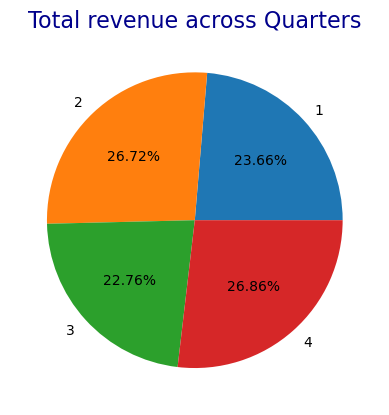

In [2545]:
plt.pie(quarter_pivot['Total Revenue ($)'], labels= quarter_pivot.index,  autopct ='%1.2f%%')
plt.title('Total revenue across Quarters', fontdict= {'fontsize': 16, 'fontweight': 10, 'color': 'darkblue'} )
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [2548]:
print(f' Data Points with 0 trip distance : {df[df['trip_distance'] == 0].shape[0]}')
print(f"The correlation between 'trip_distance' and 'fare amount' : {round(df['trip_distance'].corr(df['fare_amount']), 3)} ")

 Data Points with 0 trip distance : 0
The correlation between 'trip_distance' and 'fare amount' : 0.952 


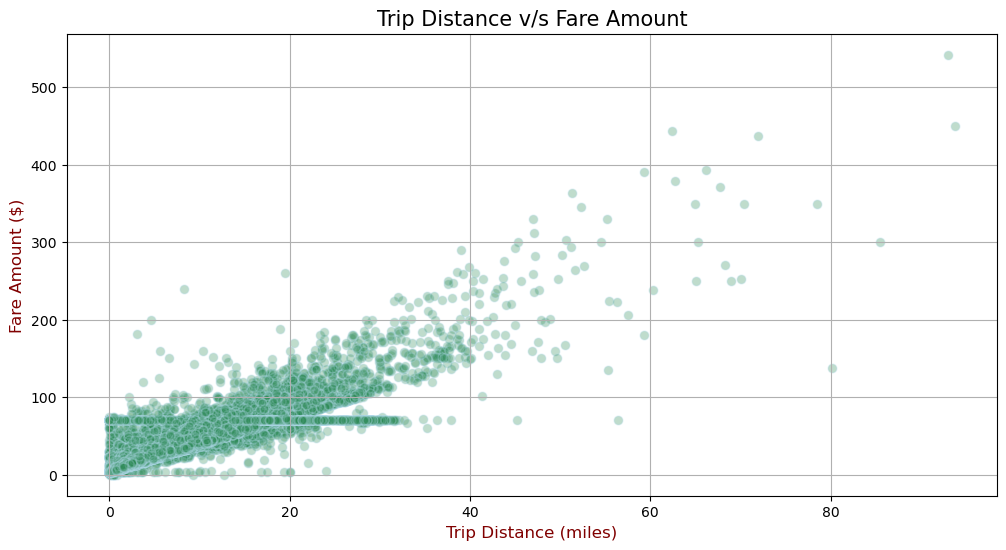

In [2550]:
# Show how trip fare is affected by distance

plt.figure(figsize= (12,6))
plt.scatter(x=df['trip_distance'], y= df['fare_amount'], alpha= 0.3, s=40, edgecolors= 'lightblue', c= 'seagreen')
plt.title('Trip Distance v/s Fare Amount', fontdict= {'fontsize': 15, 'fontweight': 50})
plt.xlabel('Trip Distance (miles)', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Fare Amount ($)', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.grid(True)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

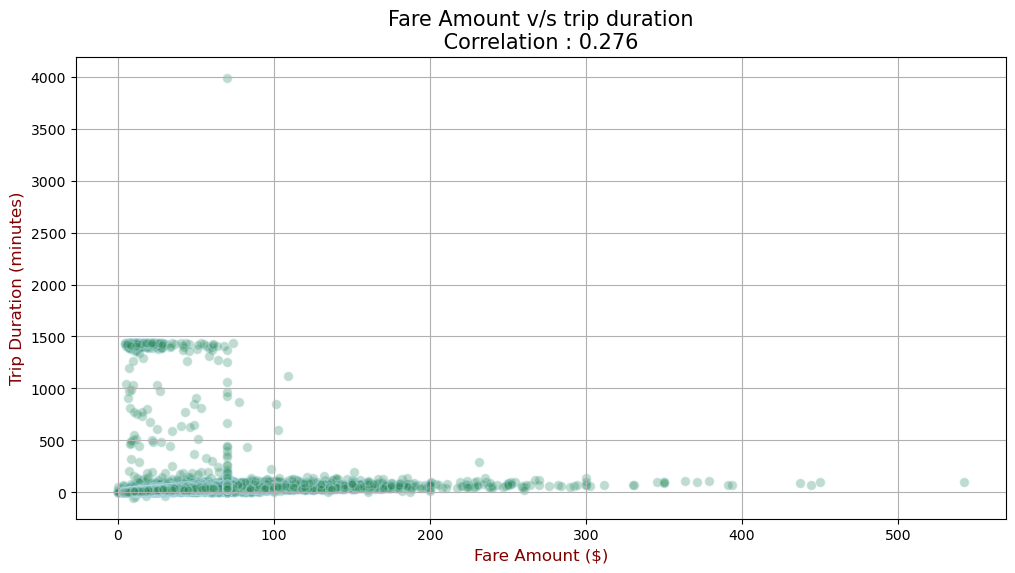

In [2553]:
# Show relationship between fare and trip duration

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# trip duration in minutes
df['trip_duration'] = round( (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()/60, 2)

# print(f' The correlation between fare and trip duration : {round( df['fare_amount'].corr(df['trip_duration']), 3) } ')

plt.figure(figsize= (12,6))
plt.scatter(x=df['fare_amount'], y= df['trip_duration'], alpha= 0.3, s=40, edgecolors= 'lightblue', c= 'seagreen')
plt.title(f'Fare Amount v/s trip duration\n Correlation : {round( df['fare_amount'].corr(df['trip_duration']), 3) } ',
          fontdict= {'fontsize': 15, 'fontweight': 50})
plt.xlabel('Fare Amount ($)', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Trip Duration (minutes)', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.grid(True)
plt.show()

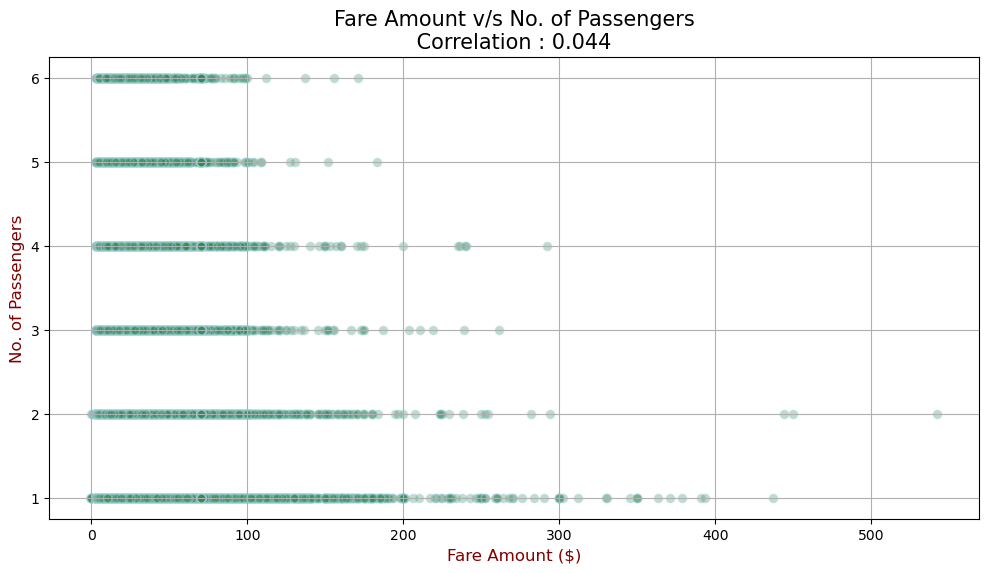

In [2555]:
# Show relationship between fare and number of passengers

plt.figure(figsize= (12,6))
plt.scatter(x=df['fare_amount'], y= df['passenger_count'], alpha= 0.3, s=40, edgecolors= 'lightblue', c= 'seagreen')
plt.title(f'Fare Amount v/s No. of Passengers\n Correlation : { round( df['fare_amount'].corr(df['passenger_count']), 3 ) } ',
          fontdict= {'fontsize': 15, 'fontweight': 50})
plt.xlabel('Fare Amount ($)', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('No. of Passengers', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.grid(True)
plt.show()

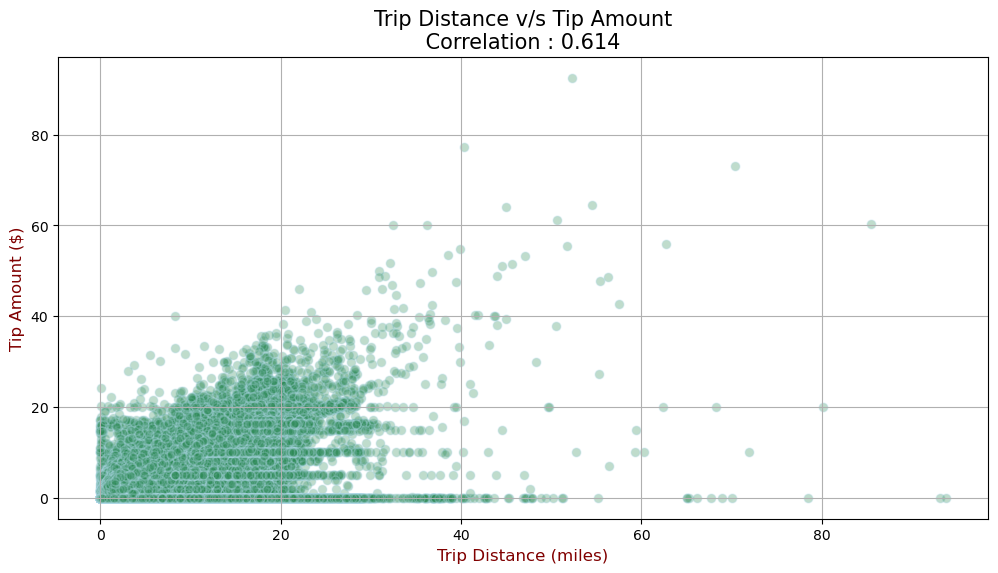

In [2557]:
# Show relationship between tip and trip distance

plt.figure(figsize= (12,6))
plt.scatter(x=df['trip_distance'], y= df['tip_amount'], alpha= 0.3, s=40, edgecolors= 'lightblue', c= 'seagreen')
plt.title(f'Trip Distance v/s Tip Amount\n Correlation : { round( df['trip_distance'].corr(df['tip_amount']), 3) } ',
          fontdict= {'fontsize': 15, 'fontweight': 50})
plt.xlabel('Trip Distance (miles)', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Tip Amount ($)', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.grid(True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

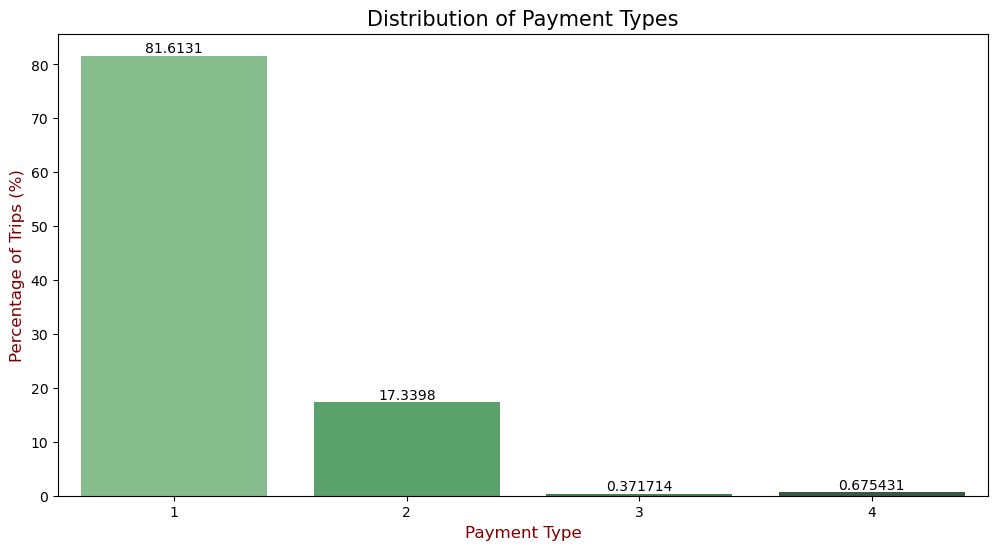

In [2562]:
# Analyse the distribution of different payment types (payment_type).

plt.figure(figsize= (12,6))
ax = sns.countplot(data= df, x= 'payment_type', palette= 'Greens_d', stat= 'percent')

for i in ax.containers:
    ax.bar_label(i, )

# plt.legend()
plt.title(f'Distribution of Payment Types', fontdict= {'fontsize': 15, 'fontweight': 50})
plt.xlabel('Payment Type', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Percentage of Trips (%)', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})

plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [2568]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [2571]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\DELL PC\Desktop\Upgrad\ML and AI\Course 2 - Data Visualisation using Python\M7 - EDA Assignment\Datasets and Dictionary\taxi_zones\taxi_zones.shp')             # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

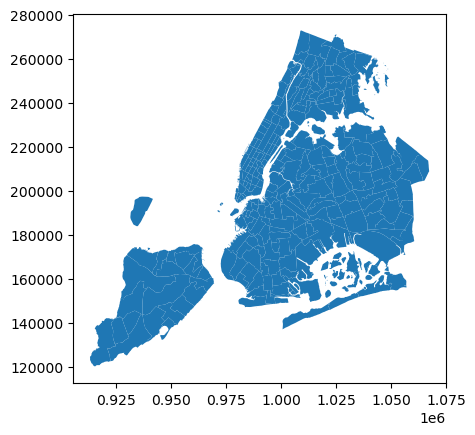

In [2574]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [2578]:
# Merge zones and trip records using locationID and PULocationID

pickup_zones = zones.copy()
drop_zones = zones.copy()

# rename columns for pickup fields
pickup_zones.rename(columns = {'LocationID': 'PULocationID',
                               'zone': 'PUzone',
                               'borough': 'PUborough',
                               'geometry': 'PUgeometry',
                               'Shape_Leng': 'PUShape_Leng',
                               'Shape_Area': 'PUShape_Area'}, inplace= True)
pickup_zones.drop('OBJECTID', axis= 1, inplace= True)

# merging pickup data in new dataframe
df_geo = df.merge(pickup_zones, on= 'PULocationID', how= 'left')

# rename columns for drop fields
drop_zones.rename(columns = {'LocationID': 'DOLocationID',
                               'zone': 'DOzone',
                               'borough': 'DOborough',
                               'geometry': 'DOgeometry',
                               'Shape_Leng': 'DOShape_Leng',
                               'Shape_Area': 'DOShape_Area'}, inplace= True)
drop_zones.drop('OBJECTID', axis= 1, inplace= True)

# merging pickup data in new dataframe
df_geo = df_geo.merge(drop_zones, on= 'DOLocationID', how= 'left')
df_geo.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:56:54   2023-01-02 00:44:49              5.0   
1         2  2023-01-01 00:37:12   2023-01-01 00:49:32              1.0   
2         2  2023-01-01 00:18:00   2023-01-01 00:23:35              1.0   
3         2  2023-01-01 00:47:53   2023-01-01 01:01:26              5.0   
4         1  2023-01-01 00:19:24   2023-01-01 00:24:55              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           3.67         1.0            43           113             1   
1           1.12         1.0           161           164             1   
2           1.04         1.0           249            79             1   
3           1.66         1.0           264           264             1   
4           0.60         1.0            79           148             4   

   fare_amount  ...  PUShape_Leng  PUShape_Area          PUzone  PUborough  \
0         28.9  ...      0.099739      0.000380    Central Park  Manhattan   
1         12.1  ...      0.035804      0.000072  Midtown Center  Manhattan   
2          7.2  ...      0.036384      0.000072    West Village  Manhattan   
3         13.5  ...           NaN           NaN             NaN        NaN   
4          6.5  ...      0.042625      0.000108    East Village  Manhattan   

                                          PUgeometry  DOShape_Leng  \
0  POLYGON ((991852.973 217950.807, 991725.244 21...      0.032745   
1  POLYGON ((991081.026 214453.698, 990952.644 21...      0.035772   
2  POLYGON ((983555.319 204876.901, 983469.158 20...      0.042625   
3                                               None           NaN   
4  POLYGON ((988746.067 202151.955, 988733.885 20...      0.039131   

   DOShape_Area                   DOzone  DOborough  \
0      0.000058  Greenwich Village North  Manhattan   
1      0.000056            Midtown South  Manhattan   
2      0.000108             East Village  Manhattan   
3           NaN                      NaN        NaN   
4      0.000070          Lower East Side  Manhattan   

                                          DOgeometry  
0  POLYGON ((986643.64 204346.324, 986592.535 204...  
1  POLYGON ((988787.425 210315.593, 988662.868 21...  
2  POLYGON ((988746.067 202151.955, 988733.885 20...  
3                                               None  
4  POLYGON ((988552.836 201677.665, 988387.669 20...  

[5 rows x 33 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [2582]:
# Group data by location and calculate the number of trips

# analysis for pickups
print('\nTotal Pickups for different LocationID\n')
pickup_count = df_geo.groupby(df_geo['PULocationID']).size().reset_index(name= 'Total Trips')
print(pickup_count)
print('-'*100)
# analysis for drops
print('\nTotal Drops for different LocationID\n')
drop_count = df_geo.groupby(df_geo['DOLocationID']).size().reset_index(name= 'Total Trips')
print(drop_count)


Total Pickups for different LocationID

     PULocationID  Total Trips
0               1            7
1               3            3
2               4          286
3               6            3
4               7          111
..            ...          ...
230           261         1506
231           262         3644
232           263         5547
233           264         2544
234           265           54

[235 rows x 2 columns]
----------------------------------------------------------------------------------------------------

Total Drops for different LocationID

     DOLocationID  Total Trips
0               1          848
1               2            1
2               3           23
3               4         1141
4               5            4
..            ...          ...
252           261         1332
253           262         4320
254           263         5871
255           264         2621
256           265         1122

[257 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [2585]:
# Merge trip counts back to the zones GeoDataFrame

pickup_zones = pickup_zones.merge(pickup_count, on= 'PULocationID', how= 'left')
pickup_zones['Total Trips'] = pickup_zones['Total Trips'].fillna(0)
pickup_zones.head()

PUShape_Leng  PUShape_Area                   PUzone  PULocationID  \
0      0.116357      0.000782           Newark Airport             1   
1      0.433470      0.004866              Jamaica Bay             2   
2      0.084341      0.000314  Allerton/Pelham Gardens             3   
3      0.043567      0.000112            Alphabet City             4   
4      0.092146      0.000498            Arden Heights             5   

       PUborough                                         PUgeometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   Total Trips  
0          7.0  
1          0.0  
2          3.0  
3        286.0  
4          0.0

In [2587]:
drop_zones = drop_zones.merge(drop_count, on= 'DOLocationID', how= 'left')
drop_zones['Total Trips'] = drop_zones['Total Trips'].fillna(0)
drop_zones.head()

DOShape_Leng  DOShape_Area                   DOzone  DOLocationID  \
0      0.116357      0.000782           Newark Airport             1   
1      0.433470      0.004866              Jamaica Bay             2   
2      0.084341      0.000314  Allerton/Pelham Gardens             3   
3      0.043567      0.000112            Alphabet City             4   
4      0.092146      0.000498            Arden Heights             5   

       DOborough                                         DOgeometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   Total Trips  
0        848.0  
1          1.0  
2         23.0  
3       1141.0  
4          4.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

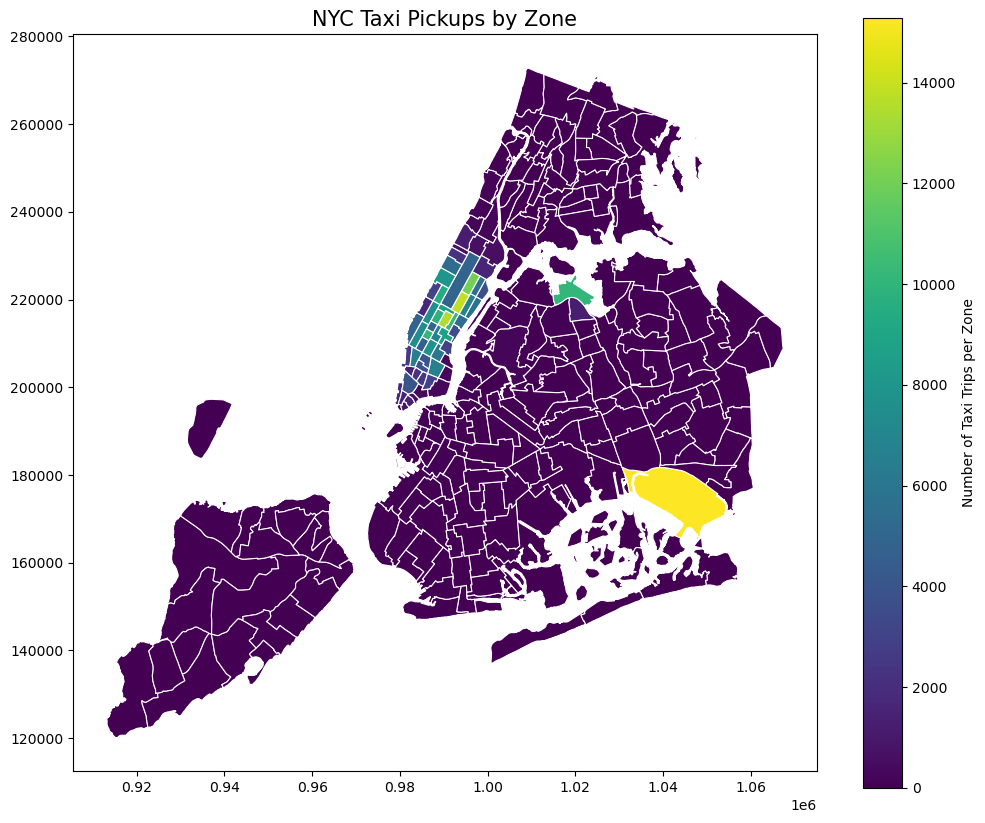

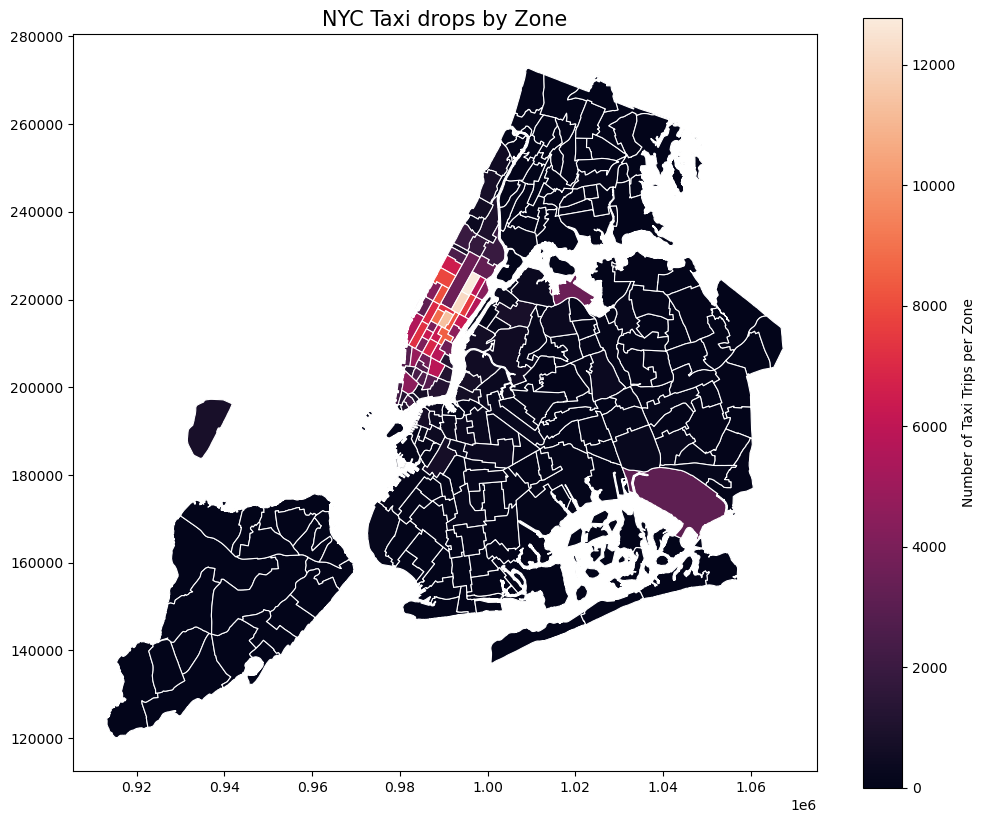

In [2943]:
# Define figure and axis
pickup_zones.set_geometry('PUgeometry', inplace= True)
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it

pickup_zones.plot(column = 'Total Trips',
                  ax = ax,
                  linewidth = 0.8,
                  legend = True,
                  edgecolor = 'white',
                  legend_kwds = {'label': 'Number of Taxi Trips per Zone', 'orientation': 'vertical'})

ax.set_title('NYC Taxi Pickups by Zone', fontsize=15)
plt.show()



# Plotting for drop off Data
# Define figure and axis
drop_zones.set_geometry('DOgeometry', inplace= True)
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it

drop_zones.plot(column = 'Total Trips',
                  ax = ax,
                  linewidth = 0.8,
                  legend = True,
                  cmap = 'rocket',
                  edgecolor = 'white',
                  legend_kwds = {'label': 'Number of Taxi Trips per Zone', 'orientation': 'vertical'})

ax.set_title('NYC Taxi drops by Zone', fontsize=15)
plt.show()



In [2593]:
# can you try displaying the zones DF sorted by the number of trips?

zones['Total Trips'] = pickup_zones['Total Trips'] + drop_zones['Total Trips']
sorted_zones = zones[['zone', 'borough', 'Total Trips']].sort_values('Total Trips', ascending= False)
sorted_zones

zone        borough  Total Trips
236      Upper East Side South      Manhattan      26009.0
160             Midtown Center      Manhattan      24847.0
235      Upper East Side North      Manhattan      24826.0
229  Times Sq/Theatre District      Manhattan      18673.0
161               Midtown East      Manhattan      18527.0
..                         ...            ...          ...
175                    Oakwood  Staten Island          0.0
186              Port Richmond  Staten Island          0.0
109           Great Kills Park  Staten Island          0.0
198              Rikers Island          Bronx          0.0
98             Freshkills Park  Staten Island          0.0

[263 rows x 3 columns]

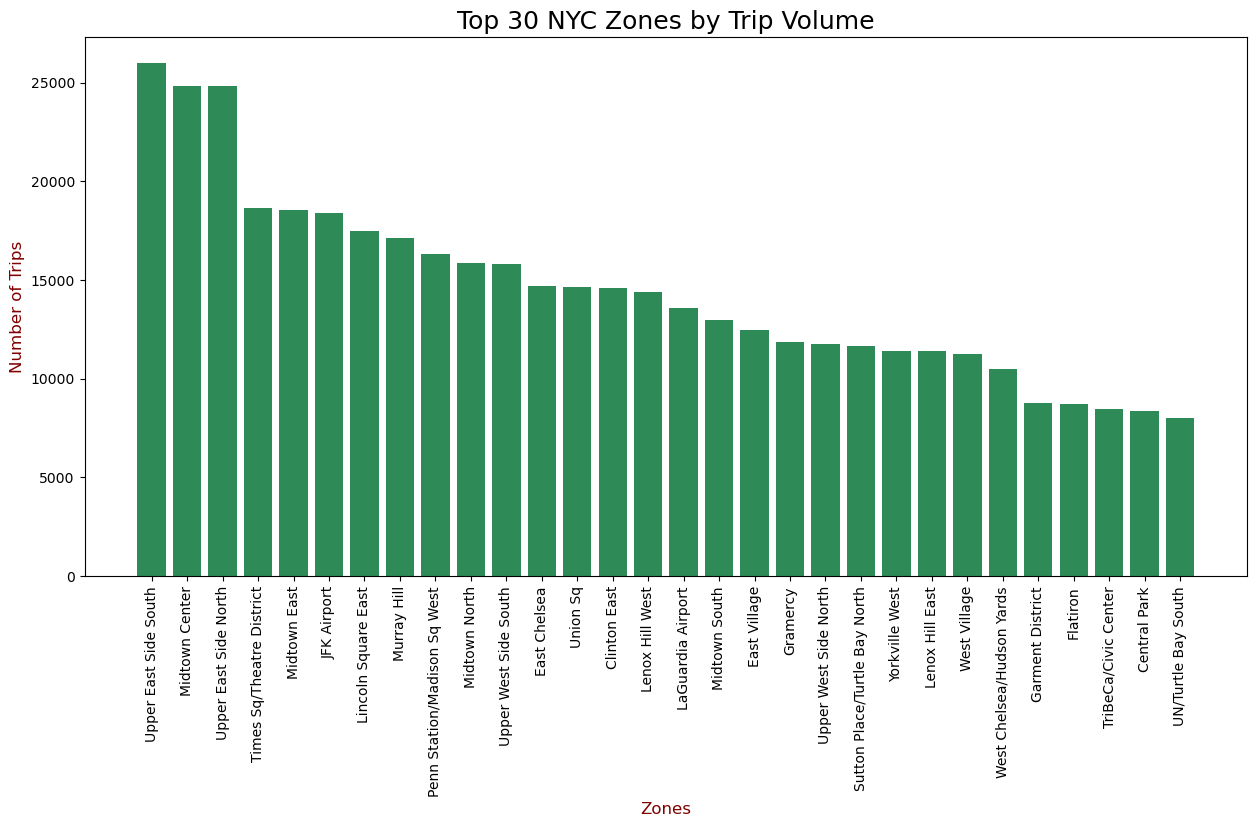

In [2598]:
plt.figure(figsize= (15,7))
ax = plt.bar(data= sorted_zones.head(30), x= 'zone', height='Total Trips',color= 'seagreen')
plt.xticks(rotation= 90)


plt.title('Top 30 NYC Zones by Trip Volume', fontdict= {'fontsize': 18, 'fontweight': 50})
plt.xlabel('Zones', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Number of Trips', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [2608]:
# converting trip duration to hours
df_geo['trip_duration'] = df_geo['trip_duration']/60

In [2610]:
df_geo.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_hour', 'pickup_month',
       'pickup_day', 'quarter', 'trip_duration', 'PUShape_Leng',
       'PUShape_Area', 'PUzone', 'PUborough', 'PUgeometry', 'DOShape_Leng',
       'DOShape_Area', 'DOzone', 'DOborough', 'DOgeometry'],
      dtype='object')

In [2612]:
# Find routes which have the slowest speeds at different times of the day


# calculating speed for all trips
df_geo['trip_speed'] = round( df_geo['trip_distance']/df_geo['trip_duration'], 2 )

# cleaning exceptionally large and negative values
df_geo = df_geo[~ ((df_geo['trip_speed'] >= 100) | (df_geo['trip_speed'] <= 0)) ]

df_geo['trip_route'] = df_geo['PUzone'] + '--' + df_geo['DOzone']

slowest_routes = df_geo.groupby(['trip_route', 'pickup_hour'])[['trip_speed', 'PULocationID']]\
    .agg({'trip_speed': 'mean', 'PULocationID': 'sum'})\
    .sort_values('trip_speed').head(10)
slowest_routes



trip_speed  \
trip_route                                         pickup_hour               
Penn Station/Madison Sq West--Queensbridge/Rave... 15                 0.01   
Kips Bay--Clinton East                             13                 0.02   
Springfield Gardens South--Springfield Gardens ... 15                 0.02   
Little Italy/NoLiTa--Hudson Sq                     13                 0.04   
Seaport--Financial District South                  11                 0.05   
Battery Park City--Seaport                         8                  0.05   
East Harlem North--Mott Haven/Port Morris          0                  0.06   
Boerum Hill--Boerum Hill                           1                  0.07   
SoHo--Alphabet City                                1                  0.08   
Marine Park/Mill Basin--Kips Bay                   7                  0.08   

                                                                PULocationID  
trip_route                                         pickup_hour                
Penn Station/Madison Sq West--Queensbridge/Rave... 15                    186  
Kips Bay--Clinton East                             13                    137  
Springfield Gardens South--Springfield Gardens ... 15                    219  
Little Italy/NoLiTa--Hudson Sq                     13                    144  
Seaport--Financial District South                  11                    209  
Battery Park City--Seaport                         8                      13  
East Harlem North--Mott Haven/Port Morris          0                      74  
Boerum Hill--Boerum Hill                           1                      25  
SoHo--Alphabet City                                1                     211  
Marine Park/Mill Basin--Kips Bay                   7                     155

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

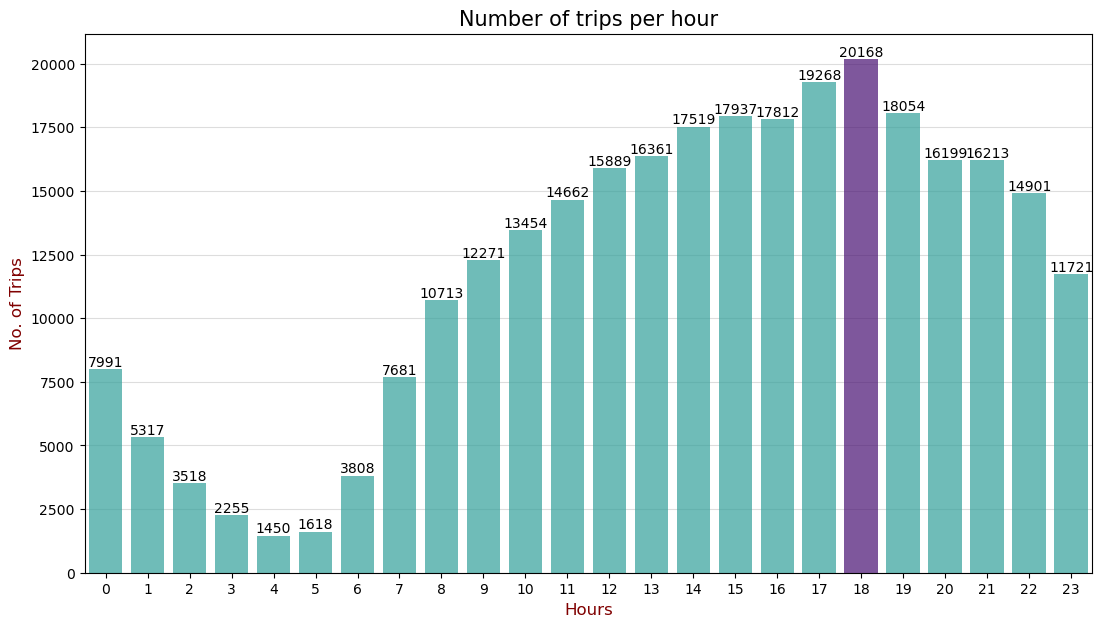

In [2924]:
# Visualise the number of trips per hour and find the busiest hour



grouped_hours = df.groupby('pickup_hour')['PULocationID'].count()

def custom_color_palette(series, max_color= 'indigo', other_color= 'lightseagreen'):
    max_val = series.max()
    pal = []
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal


plt.figure(figsize= (13,7))
plt.grid(color= '#DDDDDD')

ax = sns.barplot(data= grouped_hours, palette= custom_color_palette(grouped_hours), alpha= 0.7)

ax.set_axisbelow(True)
for i in ax.containers:
    ax.bar_label(i, )
    
plt.title('Number of trips per hour', fontdict= {'fontsize': 15, 'fontweight': 50})
plt.xlabel('Hours', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('No. of Trips', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})

plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

The actual number for trip for 5 busiest hours are:
 pickup_hour
18    2521000
17    2408500
19    2256750
15    2242125
16    2226500
Name: PULocationID, dtype: int32


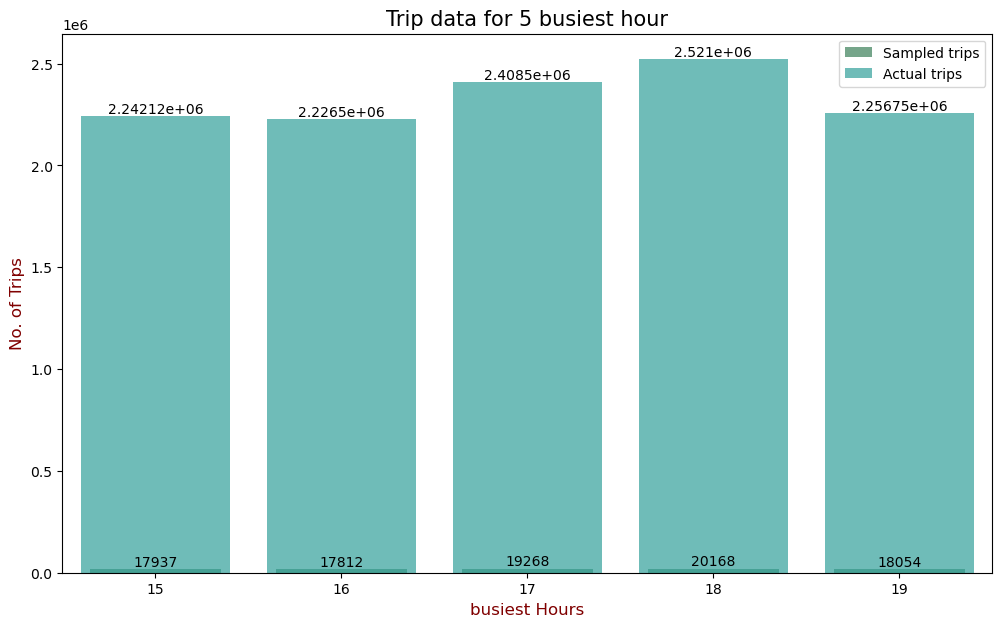

In [2938]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.008

top5_hours = grouped_hours.nlargest(5)

print(f'The actual number for trip for 5 busiest hours are:\n {(top5_hours/sample_fraction).astype('int')}')

plt.figure(figsize= (12,7))

ax1 = sns.barplot(data= top5_hours, width= 0.7, color= 'seagreen', label= 'Sampled trips', alpha= 0.7)
ax2 = sns.barplot(data= top5_hours/sample_fraction, color= 'lightseagreen', label= 'Actual trips', alpha= 0.7)

for i in ax1.containers:
    ax1.bar_label(i, )
    
plt.title('Trip data for 5 busiest hour', fontdict= {'fontsize': 15, 'fontweight': 50})
plt.xlabel('busiest Hours', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('No. of Trips', fontdict= {'fontsize': 12, 'fontweight': 50, 'color': 'Maroon'})
plt.legend()

plt.show()

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

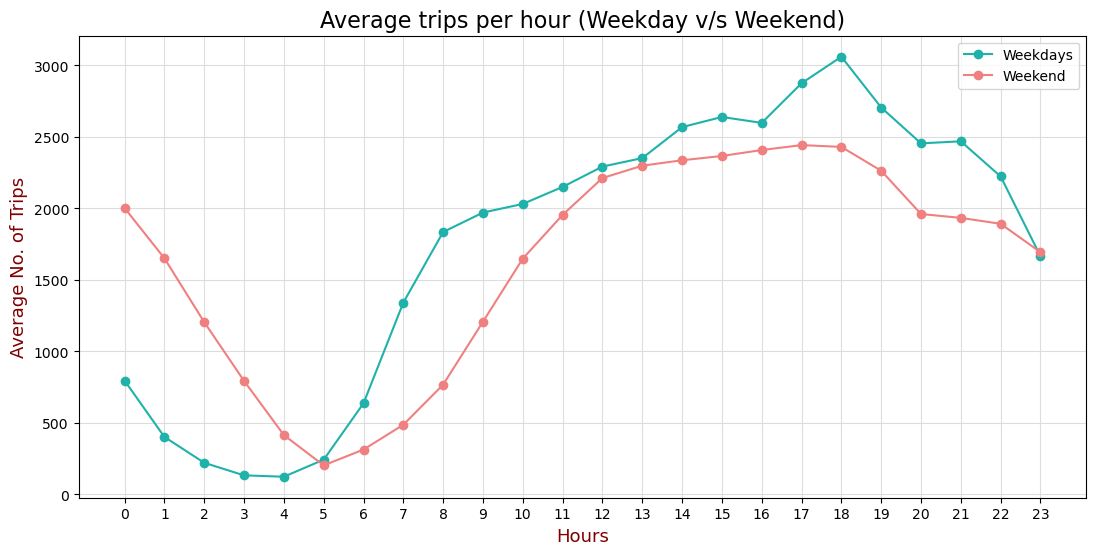

In [2906]:
# Compare traffic trends for the week days and weekends

df_geo['is_weekend']= df_geo['pickup_day'].isin(['Saturday', 'Sunday'])
grouped_weekend = df_geo.groupby(['pickup_hour', 'is_weekend']).size().unstack()
grouped_weekend.columns = ['Weekday', 'Weekend']

# Average values for hours
grouped_weekend['Weekday'] = grouped_weekend['Weekday']/5
grouped_weekend['Weekend'] = grouped_weekend['Weekend']/2

# Plotting graph for weekday and weekend
plt.figure(figsize= (13,6))
plt.plot(grouped_weekend['Weekday'], 'o-', color= 'lightseagreen', label= 'Weekdays')
plt.plot(grouped_weekend['Weekend'], 'o-', color= 'lightcoral', label= 'Weekend')
plt.xticks(np.arange(24) )

# Titles and labels
plt.title('Average trips per hour (Weekday v/s Weekend)', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Hours', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Average No. of Trips', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.legend()
plt.grid(which='major', color= '#DDDDDD')

plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

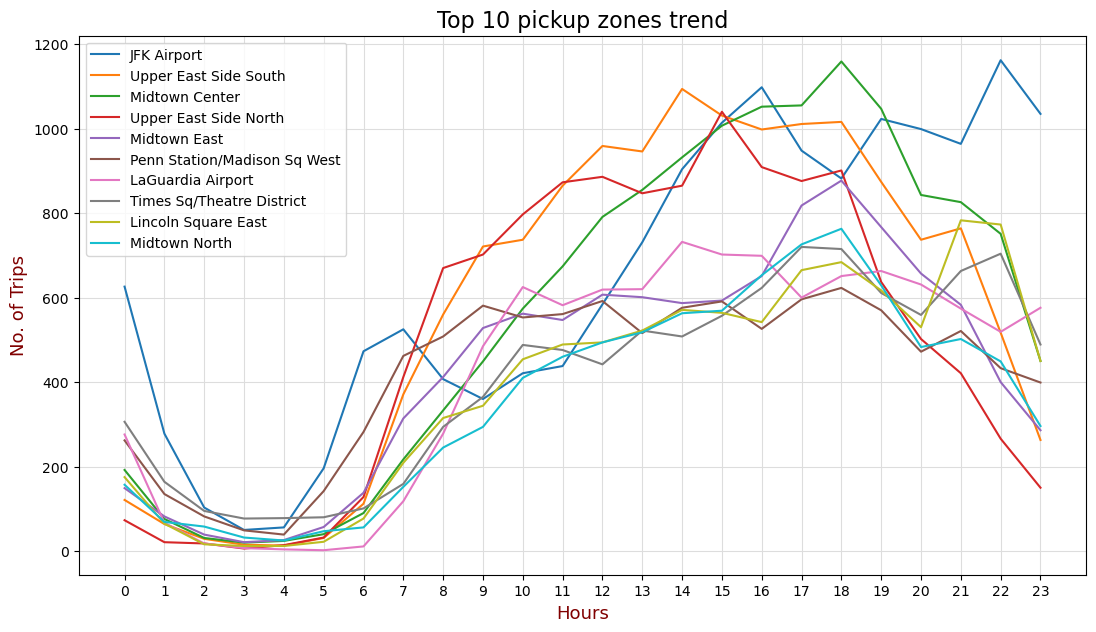

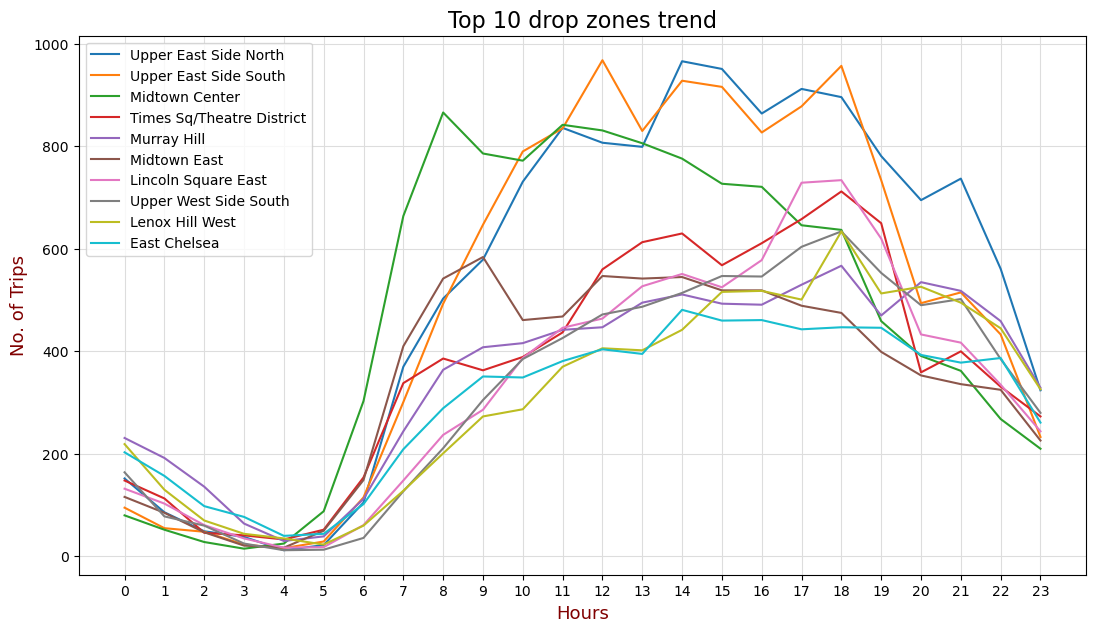

In [2946]:
# Find top 10 pickup and dropoff zones

pickup_10 = df_geo['PUzone'].value_counts().head(10)
drop_10 = df_geo['DOzone'].value_counts().head(10)

plt.figure(figsize= (13,7))
# plotting top10 pickup zones
for zone in pickup_10.index:
    zone_data = df_geo[df_geo['PUzone'] == zone].groupby('pickup_hour').size()
    plt.plot(zone_data, label= zone, )
    

# Titles and labels
plt.title('Top 10 pickup zones trend', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Hours', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('No. of Trips', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.xticks(np.arange(24) )
plt.legend()

plt.grid(which='major', color= '#DDDDDD')
plt.show()



# plotting top 10 drop zones
plt.figure(figsize= (13,7))
for zone in drop_10.index:
    zone_data = df_geo[df_geo['DOzone'] == zone].groupby('pickup_hour').size()
    plt.plot(zone_data, label= zone, )

# Titles and labels
plt.title('Top 10 drop zones trend', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Hours', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('No. of Trips', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.xticks(np.arange(24) )
plt.legend()

plt.grid(which='major', color= '#DDDDDD')
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

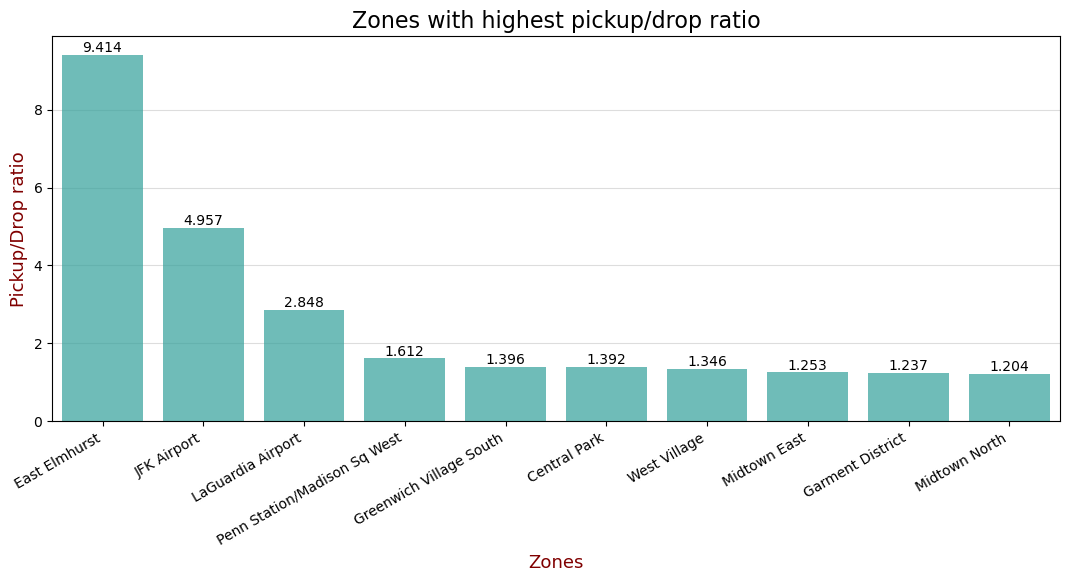

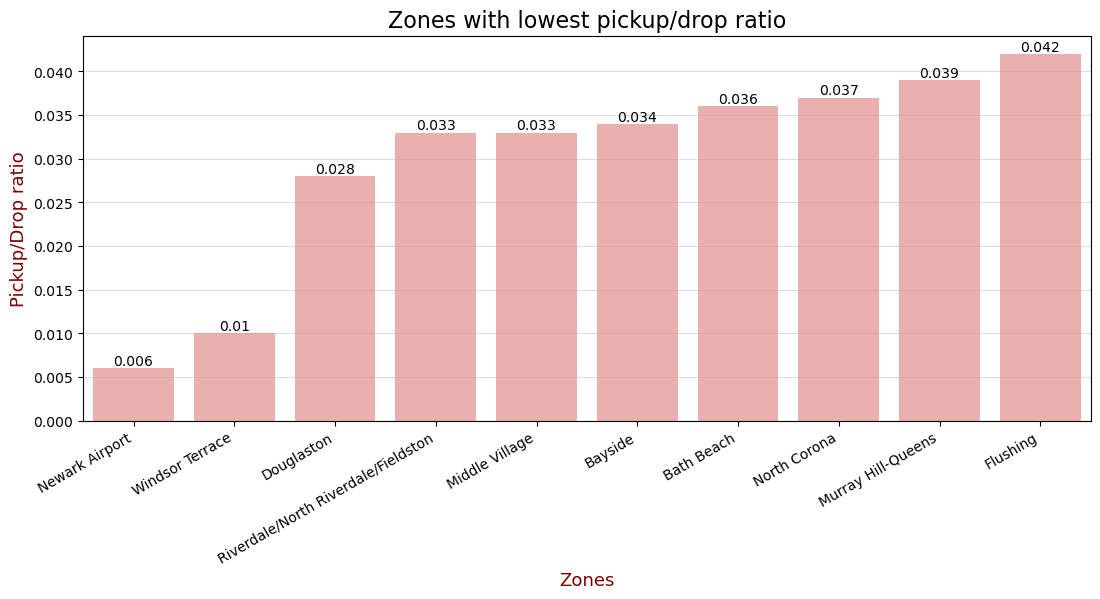

In [2916]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

zone_ratio = (df_geo.groupby('PUzone')['PUzone'].count()) / (df_geo.groupby('DOzone')['DOzone'].count())
pickup_10 = zone_ratio.nlargest(10)
drop_10 = zone_ratio.nsmallest(10)

# plot zones with highest pickup/drop ratio
plt.figure(figsize= (13,5))
plt.grid(color= '#DDDDDD')
ax = sns.barplot(data= pickup_10.round(3), color= 'lightseagreen', alpha= 0.7)

ax.set_axisbelow(True)
for i in ax.containers:
    ax.bar_label(i)
    
plt.xticks(rotation= 30, ha = 'right')
plt.title('Zones with highest pickup/drop ratio', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Zones', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Pickup/Drop ratio', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})

plt.show()


# plot zones with lowest pickup/drop ratio
plt.figure(figsize= (13,5))
plt.grid(color= '#DDDDDD')
ax = sns.barplot(data= drop_10.round(3), color= 'lightcoral', alpha= 0.7)

ax.set_axisbelow(True)
for i in ax.containers:
    ax.bar_label(i)
    
plt.xticks(rotation= 30, ha = 'right')
plt.title('Zones with lowest pickup/drop ratio', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Zones', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Pickup/Drop ratio', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})

plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

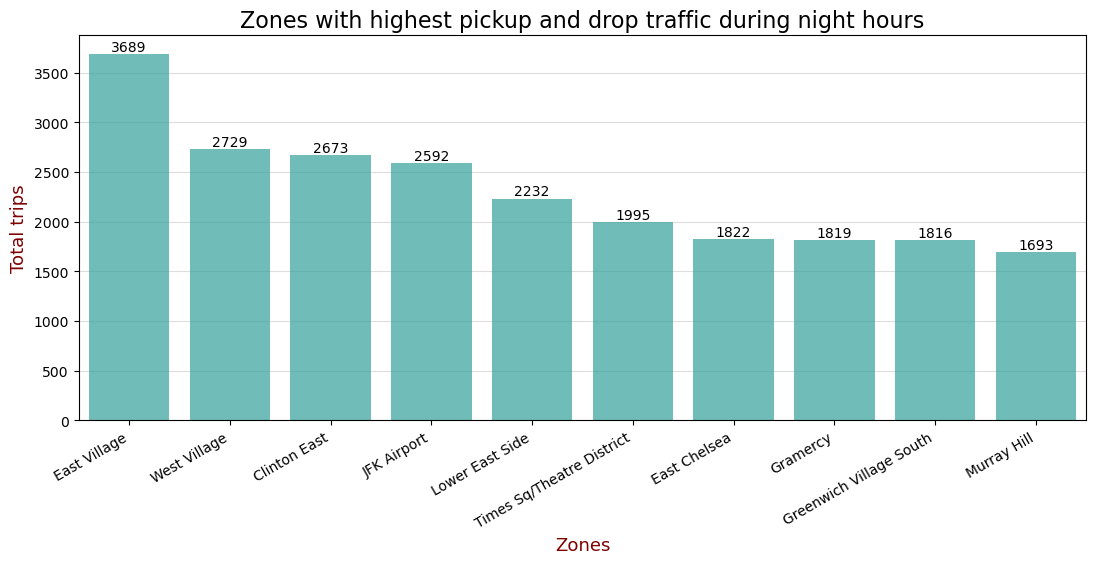

In [2928]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones


# Pickup count of all zones for night hours
pickup_night = df_geo[df_geo['pickup_hour'].isin([23,0,1,2,3,4,5])].groupby(['PUzone'])['PUzone'].count()
# Drop count of all zones for night hours
drop_night = df_geo[df_geo['pickup_hour'].isin([23,0,1,2,3,4,5])].groupby(['DOzone'])['DOzone'].count()

# Total trip count for all zones
total_night = (pickup_night + drop_night).fillna(0).astype('int')
total_night.nlargest(10)

# Plot zones with high pickup and drop traffic during night hours
plt.figure(figsize= (13,5))
plt.grid(color= '#DDDDDD')
ax = sns.barplot(data= total_night.nlargest(10), color= 'lightseagreen', alpha= 0.7)

ax.set_axisbelow(True)
for i in ax.containers:
    ax.bar_label(i)
    
plt.xticks(rotation= 30, ha = 'right')
plt.title('Zones with highest pickup and drop traffic during night hours', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Zones', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Total trips', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})

plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

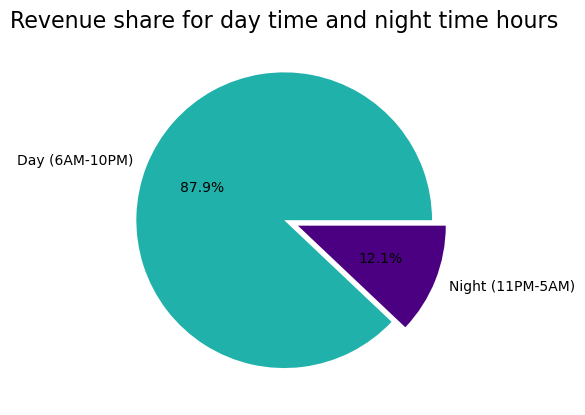

In [2787]:
# Filter for night hours (11 PM to 5 AM)

#define nihht hours
night_hours = [23,0,1,2,3,4,5]

# calculate total revenue for night hours
revenue_night = round( df_geo[df_geo['pickup_hour'].isin(night_hours)]['total_amount'].sum() )

# calculate total revenue for day time hours
revenue_day = round( df_geo[ ~(df_geo['pickup_hour'].isin(night_hours)) ]['total_amount'].sum() )
revenue_day

# plt the graph
plt.pie([revenue_day, revenue_night], 
        labels=['Day (6AM-10PM)', 'Night (11PM-5AM)'],
        autopct='%1.1f%%',
        colors=['lightseagreen', 'indigo'],
        explode=(0, 0.1))

plt.title('Revenue share for day time and night time hours', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.show()



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

fare_per_mile_per_passenger  trip_distance
passenger_count                                            
1.0                                 9.770254       3.373346
2.0                                 5.528970       4.119528
3.0                                 3.561860       3.940737
4.0                                 2.332518       4.226104
5.0                                 1.580859       3.545588
6.0                                 1.394895       3.426291

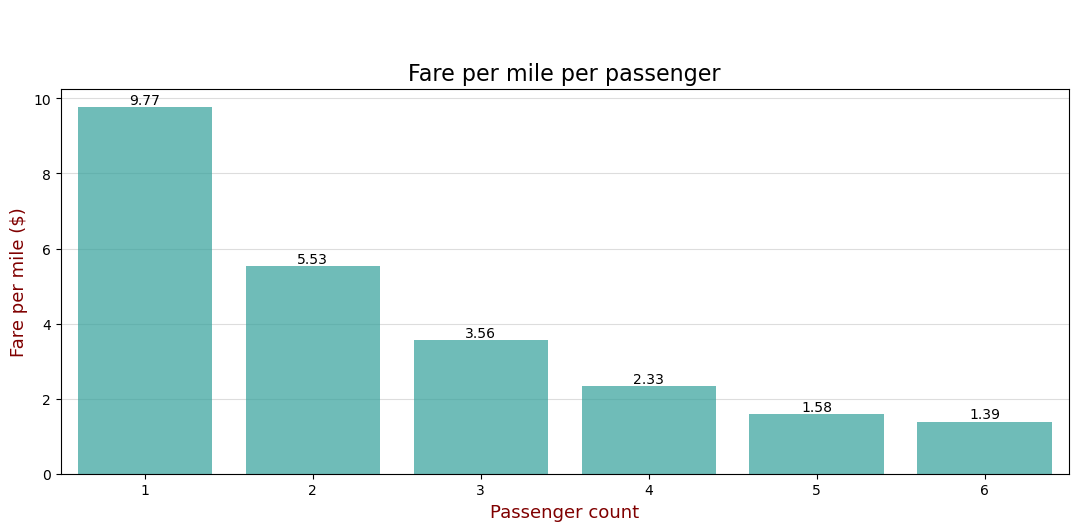

In [2930]:
# Analyse the fare per mile per passenger for different passenger counts

# caclulate and add a column for fare per mile per passenger
df_geo['fare_per_mile_per_passenger'] = (df_geo['fare_amount'] / df_geo['trip_distance']) / df_geo['passenger_count']

grouped_passengerdata = df_geo.groupby('passenger_count')[['fare_per_mile_per_passenger', 'trip_distance']].mean()
display(grouped_passengerdata)

# plotting graph to represent fare per mile per passenger

plt.figure(figsize= (13,5))
plt.grid(color= '#DDDDDD')

ax = sns.barplot(x= grouped_passengerdata.index.astype('int'), y= round(grouped_passengerdata['fare_per_mile_per_passenger'], 2),
                 color= 'lightseagreen', alpha= 0.7)

for i in ax.containers:
    ax.bar_label(i)

ax.set_axisbelow(True)
plt.title('\n\nFare per mile per passenger', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Passenger count', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Fare per mile ($)', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})

plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

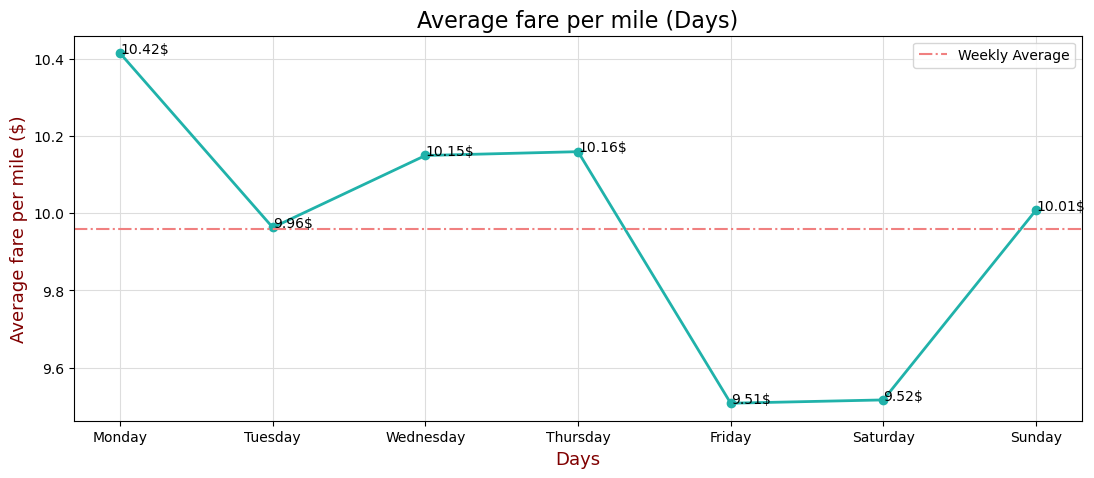

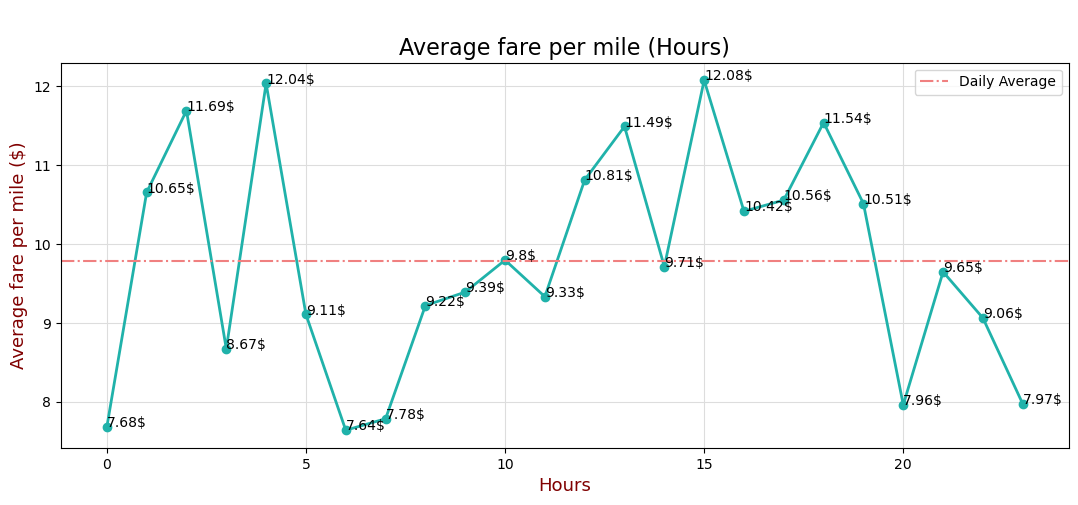

In [2643]:
# Compare the average fare per mile for different days and for different times of the day

df_geo['fare_per_mile'] = df_geo['fare_amount'] / df_geo['trip_distance']
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# calculate average fare per mile for days and times of day
grouped_fare_day = df_geo.groupby('pickup_day')['fare_per_mile'].mean().reindex(days)
grouped_fare_hour = df_geo.groupby('pickup_hour')['fare_per_mile'].mean()



# plotting graph for average fare per mile for different days
plt.figure(figsize= (13,5))
plt.plot(grouped_fare_day,'o-', color= 'lightseagreen', linewidth= 2)

#plotting average line
plt.axhline(y= np.mean(grouped_fare_day.values), color= 'lightcoral', linestyle= '-.', label= 'Weekly Average')

# adding annotations
for xy in zip(grouped_fare_day.index, grouped_fare_day.values):
    plt.annotate(text= f'{ round(xy[1], 2) }$', xy= xy, textcoords= 'data')

# Titles and labels
plt.title('Average fare per mile (Days)', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Days', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Average fare per mile ($)', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.grid(which='major', color= '#DDDDDD')
plt.legend()
plt.show()



# plotting graph for average fare per mile for different days
plt.figure(figsize= (13,5))
plt.plot(grouped_fare_hour,'o-', color= 'lightseagreen', linewidth= 2)

#plotting average line
plt.axhline(y= np.mean(grouped_fare_hour.values), color= 'lightcoral', linestyle= '-.', label= 'Daily Average')

# adding annotations
for xy in zip(grouped_fare_hour.index, grouped_fare_hour.values):
    plt.annotate(text= f'{ round(xy[1], 2) }$', xy= xy, textcoords= 'data')

# Titles and labels
plt.title('\nAverage fare per mile (Hours)', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Hours', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Average fare per mile ($)', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.grid(which='major', color= '#DDDDDD')
plt.legend()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

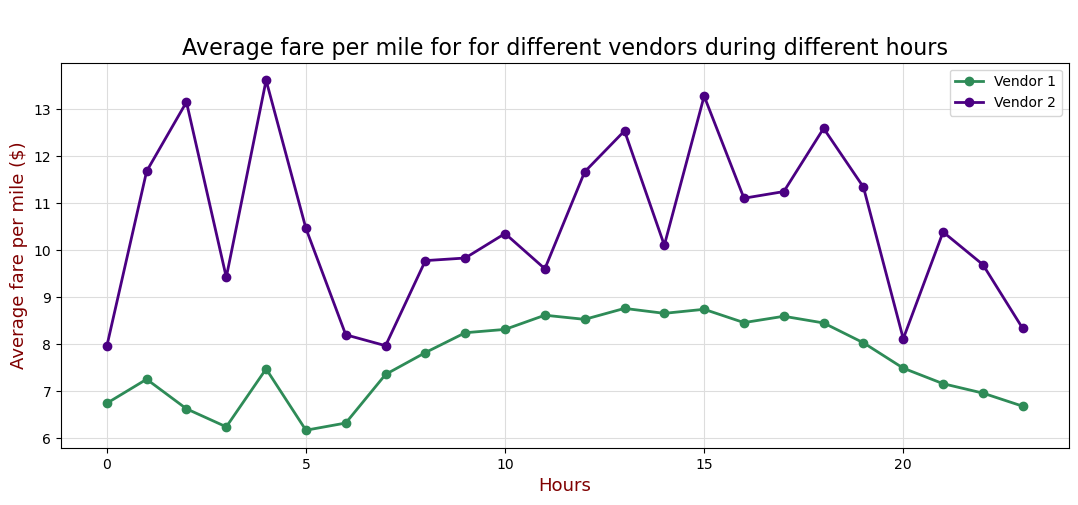

In [2670]:
# Compare fare per mile for different vendors

grouped_fare_vendor = df_geo.groupby(['pickup_hour', 'VendorID'])['fare_per_mile'].mean().unstack()

# plotting graph for different vendors
plt.figure(figsize= (13,5))
plt.plot(grouped_fare_vendor.index, grouped_fare_vendor[1], 'o-' , color= 'seagreen', linewidth= 2, label= 'Vendor 1')
plt.plot(grouped_fare_vendor.index, grouped_fare_vendor[2], 'o-' , color= 'indigo', linewidth= 2, label= 'Vendor 2')


# Titles and labels
plt.title('\nAverage fare per mile for for different vendors during different hours', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Hours', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Average fare per mile ($)', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.grid(which='major', color= '#DDDDDD')
plt.legend()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.



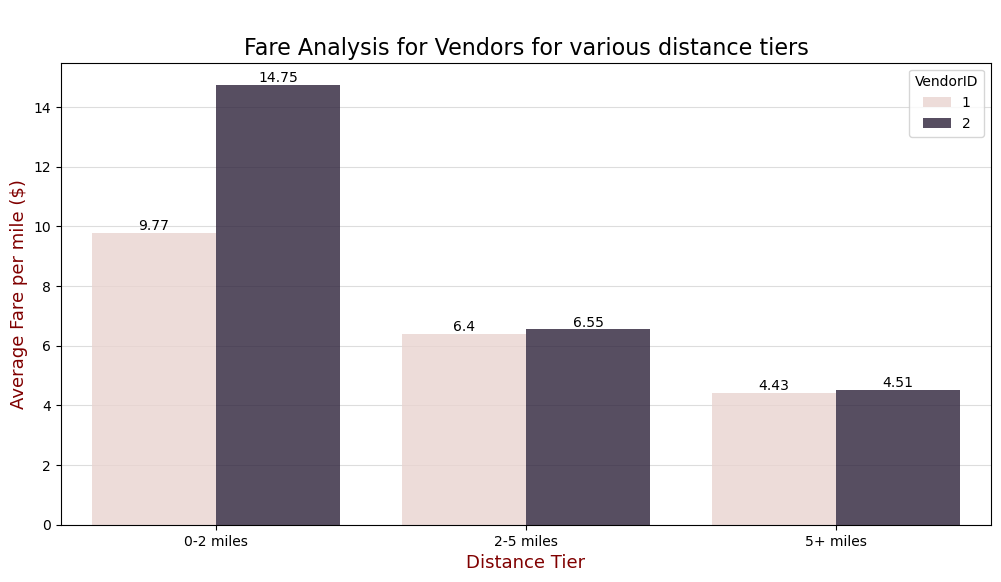

In [2728]:
# Defining distance tiers
df_vendors = df_geo.copy()
df_vendors['distance_tier'] = pd.cut(df_vendors['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['0-2 miles', '2-5 miles', '5+ miles'])

# Calculate average fare per mile for each tier and vendor
tier_analysis = df_vendors.groupby(['distance_tier', 'VendorID']).agg( fare_per_mile= ('fare_per_mile' , 'mean') ).round(2)

# plotting data in grouped manner
plt.figure(figsize= (12,6))
plt.grid(color= '#DDDDDD')
ax= sns.barplot(data= tier_analysis, x= 'distance_tier', y= 'fare_per_mile', hue= 'VendorID', alpha= 0.8)

for i in ax.containers:
    ax.bar_label(i)

ax.set_axisbelow(True)

plt.title('\nFare Analysis for Vendors for various distance tiers', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Distance Tier', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Average Fare per mile ($)', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})

plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

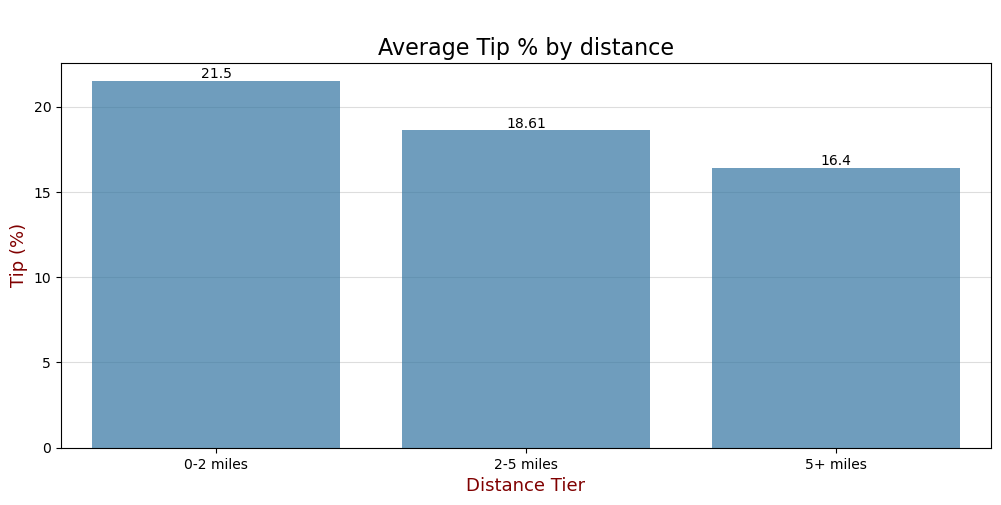

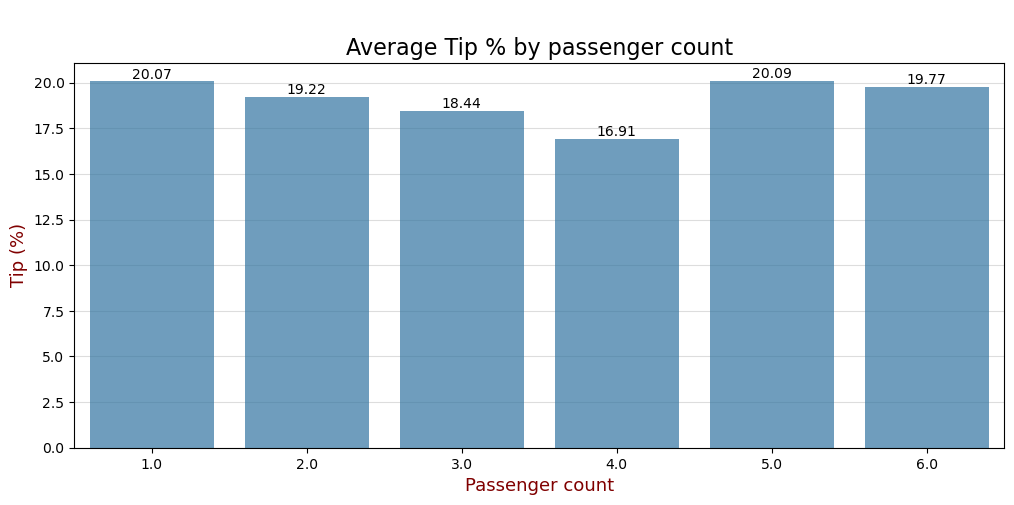

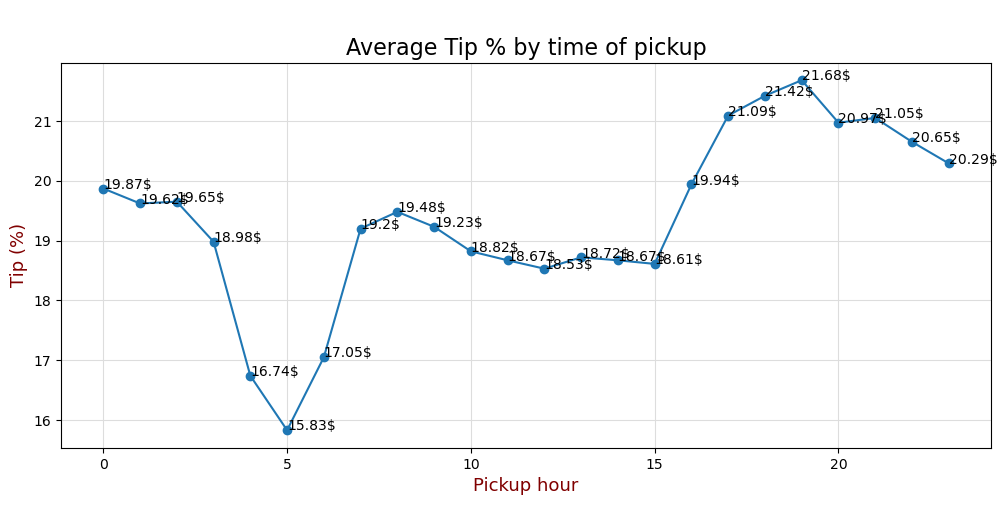

In [2781]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# calculate tip percentage
df_geo['tip_percentage'] = (df_geo['tip_amount'] / df_geo['fare_amount']) * 100
df_vendors['tip_percentage'] = (df_vendors['tip_amount'] / df_vendors['fare_amount']) * 100

# Plotting tip percentage based on distance
plt.figure(figsize= (12,5))
plt.grid(color= '#DDDDDD')
ax= sns.barplot(data= df_vendors.groupby('distance_tier')['tip_percentage'].mean().round(2), alpha= 0.7)

for i in ax.containers:
    ax.bar_label(i)

ax.set_axisbelow(True)
plt.title('\nAverage Tip % by distance', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Distance Tier', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Tip (%)', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.show()



# calculate tip percentage based on passenger count
plt.figure(figsize= (12,5))
plt.grid(color= '#DDDDDD')
ax= sns.barplot(data= df_vendors.groupby('passenger_count')['tip_percentage'].mean().round(2), alpha= 0.7)

for i in ax.containers:
    ax.bar_label(i)

ax.set_axisbelow(True)
plt.title('\nAverage Tip % by passenger count', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Passenger count', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Tip (%)', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.show()



# calculate tip percentage based on time of pickup
grouped_tip_hour = df_vendors.groupby('pickup_hour')['tip_percentage'].mean().round(2)
plt.figure(figsize= (12,5))
plt.grid(color= '#DDDDDD')
ax= plt.plot(grouped_tip_hour, 'o-')

for xy in zip(grouped_tip_hour.index, grouped_tip_hour.values):
    plt.annotate(text= f'{ xy[1] }$', xy= xy, textcoords= 'data')
    
plt.title('\nAverage Tip % by time of pickup', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Pickup hour', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Tip (%)', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [1376]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

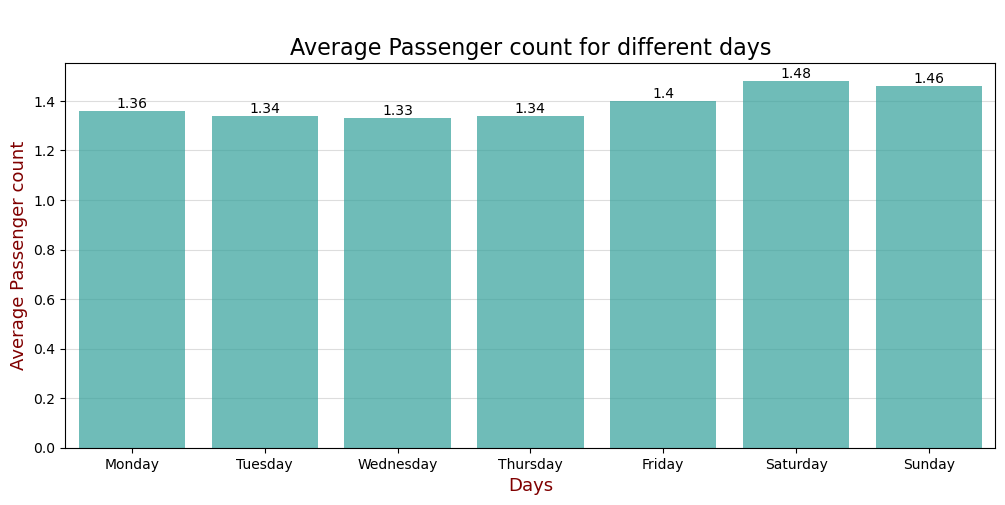

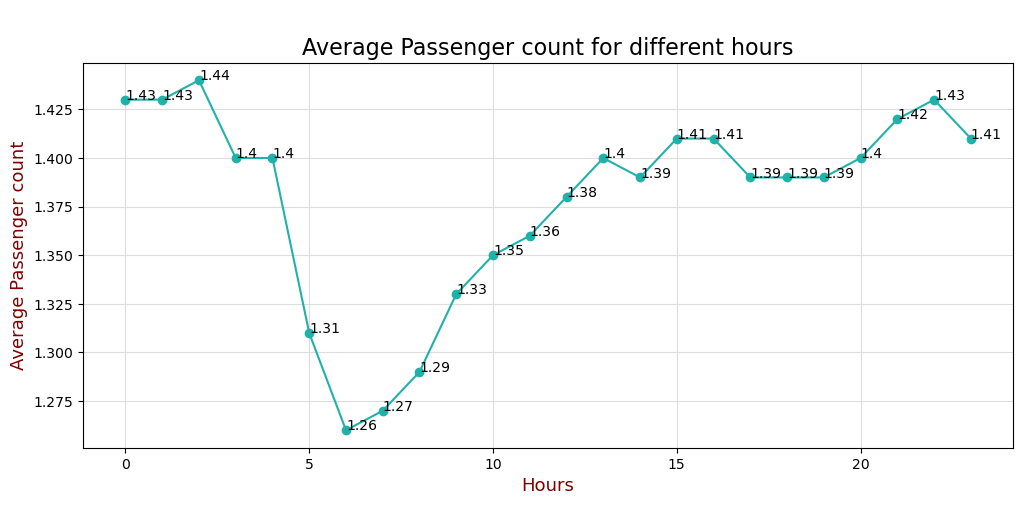

In [2836]:
# See how passenger count varies across hours and days

# Plotting Average passenger count across days
plt.figure(figsize= (12,5))
plt.grid(color= '#DDDDDD')
# def colors(day):
#     color = []
#     if day in ('Saturday', 'Sunday'):
#         color.append('plum')
#     else:
#         color.append('lightseagreen')
#     return color
        
ax= sns.barplot(data= df_vendors.groupby('pickup_day')['passenger_count'].mean().round(2).reindex(days), color= 'lightseagreen', alpha= 0.7)

for i in ax.containers:
    ax.bar_label(i)

ax.set_axisbelow(True)
plt.title('\nAverage Passenger count for different days', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Days', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Average Passenger count', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.show()




# Plotting Average passenger count across days
grouped_passengerdata = df_vendors.groupby('pickup_hour')['passenger_count'].mean().round(2)
plt.figure(figsize= (12,5))
plt.grid(color= '#DDDDDD')
        
ax= plt.plot(grouped_passengerdata, 'o-', color= 'lightseagreen')

for xy in zip(grouped_passengerdata.index, grouped_passengerdata.values):
    plt.annotate(text= f'{ xy[1] }', xy= xy, textcoords= 'data')
    
plt.title('\nAverage Passenger count for different hours', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Hours', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('Average Passenger count', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [2870]:
# How does passenger count vary across zones

grouped_zone = df_geo.groupby('PUzone').agg({'passenger_count': ['mean', 'count']}).round(2)
grouped_zone.columns = ['Average Passenger count', 'Total Passengers']

grouped_zone.sort_values('Total Passengers', ascending= False, inplace= True)
grouped_zone = grouped_zone.head(20)
grouped_zone

Average Passenger count  Total Passengers
PUzone                                                                 
JFK Airport                                      1.50             15277
Upper East Side South                            1.34             13849
Midtown Center                                   1.39             13488
Upper East Side North                            1.34             12046
Midtown East                                     1.33             10302
Penn Station/Madison Sq West                     1.35             10071
LaGuardia Airport                                1.35             10059
Times Sq/Theatre District                        1.50              9796
Lincoln Square East                              1.40              9385
Midtown North                                    1.38              8650
Murray Hill                                      1.34              8630
Upper West Side South                            1.39              7948
Union Sq                                         1.37              7778
Clinton East                                     1.42              7582
East Chelsea                                     1.41              7439
Lenox Hill West                                  1.32              6824
Midtown South                                    1.42              6699
East Village                                     1.42              6626
West Village                                     1.40              6453
Gramercy                                         1.33              6088

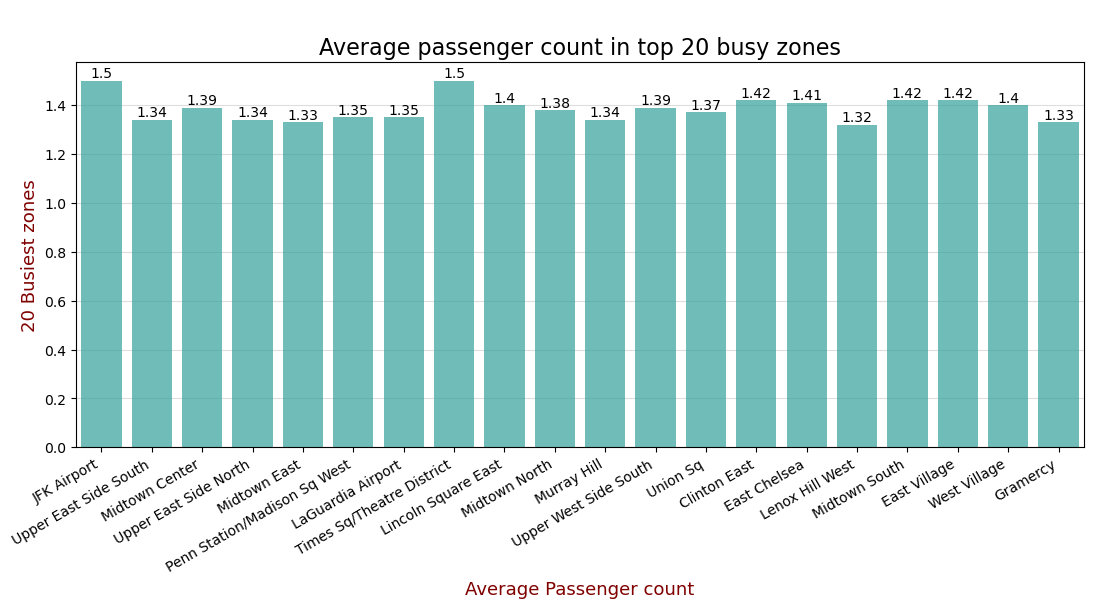

In [2882]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.


plt.figure(figsize= (13,5))
plt.grid(color= '#DDDDDD')
ax= sns.barplot(x= grouped_zone.index, y= grouped_zone['Average Passenger count'], alpha= 0.7, color= 'lightseagreen')

for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation= 30, ha = 'right')
ax.set_axisbelow(True)
plt.title('\nAverage passenger count in top 20 busy zones', fontdict= {'fontsize': 16, 'fontweight': 50})
plt.xlabel('Average Passenger count', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.ylabel('20 Busiest zones', fontdict= {'fontsize': 13, 'fontweight': 50, 'color': 'Maroon'})
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

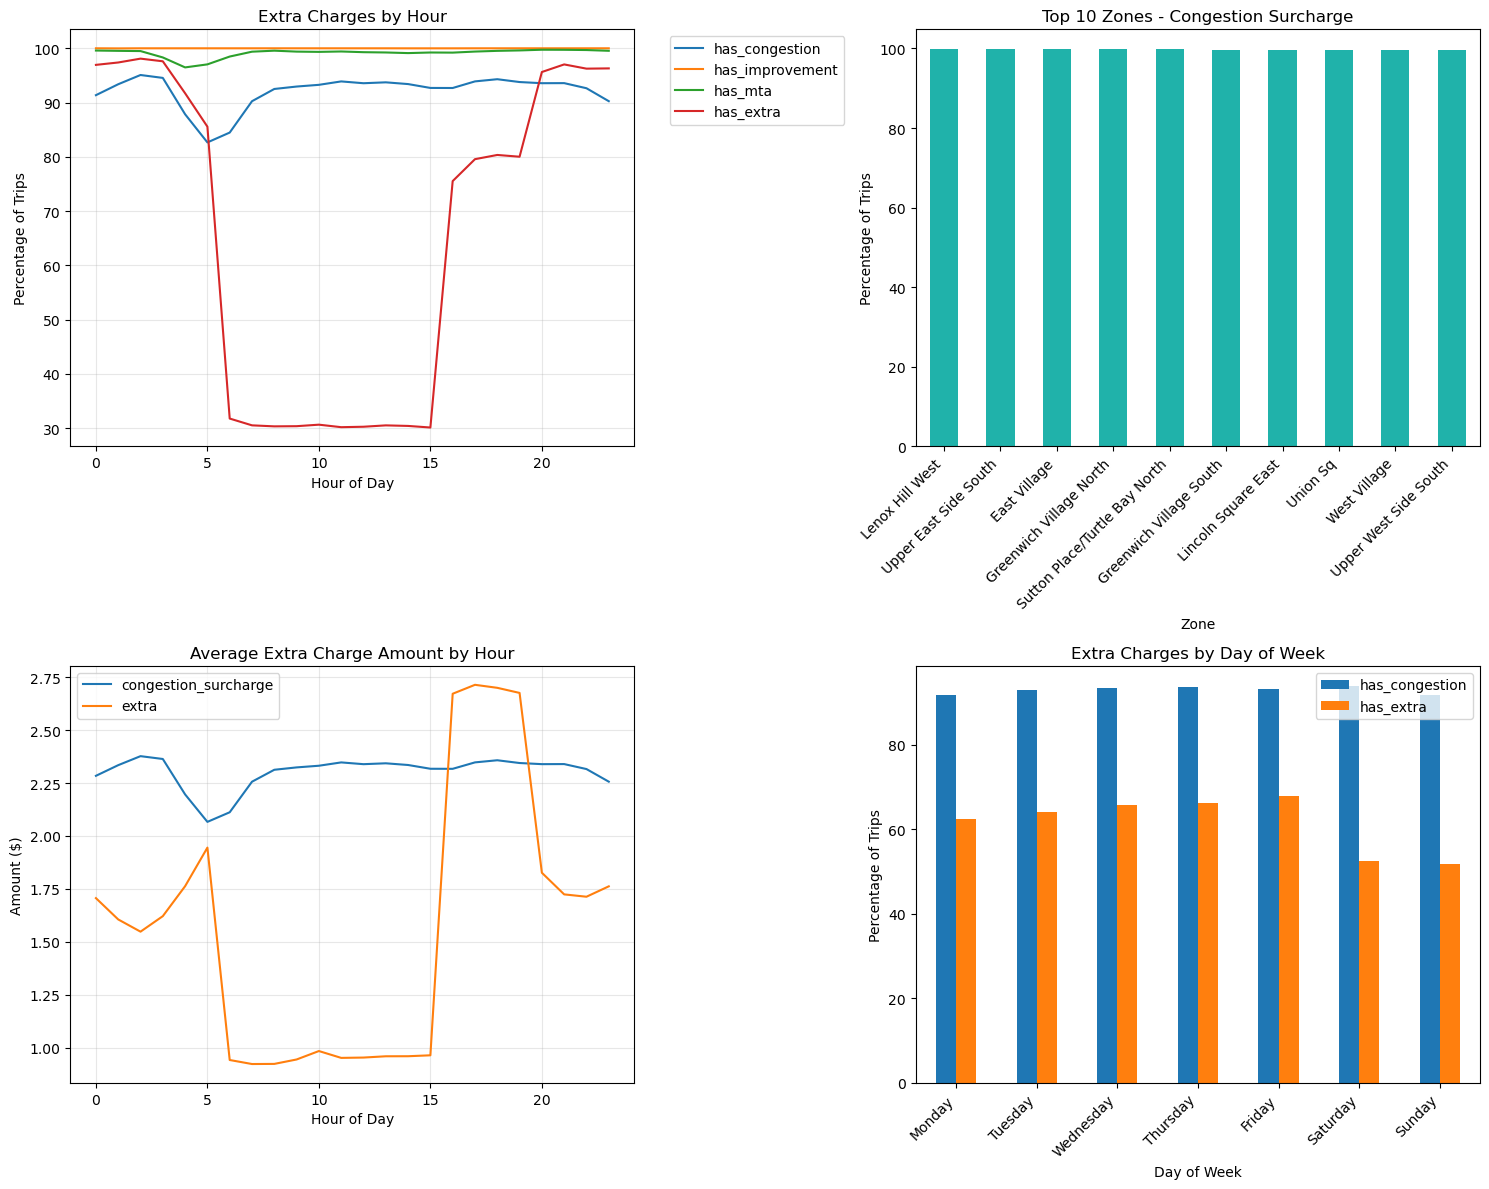

In [2940]:
# How often is each surcharge applied?

# Create a function to check if a trip has extra charges
def has_extra_charges(row):
    return {
        'congestion_surcharge': row['congestion_surcharge'] > 0,
        'improvement_surcharge': row['improvement_surcharge'] > 0,
        'mta_tax': row['mta_tax'] > 0,
        'extra': row['extra'] > 0
    }


# Add flags for each type of surcharge
df_vendors['has_congestion'] = df_vendors['congestion_surcharge'] > 0
df_vendors['has_improvement'] = df_vendors['improvement_surcharge'] > 0
df_vendors['has_mta'] = df_vendors['mta_tax'] > 0
df_vendors['has_extra'] = df_vendors['extra'] > 0

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Hourly distribution of extra charges
hourly_charges = df_vendors.groupby('pickup_hour').agg({'has_congestion': 'mean', 'has_improvement': 'mean', 'has_mta': 'mean', 'has_extra': 'mean'})*100

hourly_charges.plot(ax=ax1)
ax1.set_title('Extra Charges by Hour')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Percentage of Trips')
ax1.legend(bbox_to_anchor=(1.05, 1))
ax1.grid(True, alpha=0.3)


# 2. Top 10 zones with highest extra charges
zone_charges = df_vendors.groupby('PUzone').agg({ 'has_congestion': 'mean', 'has_extra': 'mean' }) * 100

top_congestion = zone_charges.nlargest(10, 'has_congestion')
top_congestion['has_congestion'].plot(kind='bar', ax=ax2, color= 'lightseagreen')
ax2.set_title('Top 10 Zones - Congestion Surcharge')
ax2.set_xlabel('Zone')
ax2.set_ylabel('Percentage of Trips')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')


# 3. Average amount of extra charges
extra_amounts = df_vendors.groupby('pickup_hour').agg({
    'congestion_surcharge': 'mean',
    'extra': 'mean'
})

extra_amounts.plot(ax=ax3)
ax3.set_title('Average Extra Charge Amount by Hour')
ax3.set_xlabel('Hour of Day')
ax3.set_ylabel('Amount ($)')
ax3.grid(True, alpha=0.3)


# 4. Day of week analysis
daily_charges = df_vendors.groupby('pickup_day').agg({ 'has_congestion': 'mean', 'has_extra': 'mean' }) * 100

# Reorder days
daily_charges = daily_charges.reindex(days)

daily_charges.plot(kind='bar', ax=ax4)
ax4.set_title('Extra Charges by Day of Week')
ax4.set_xlabel('Day of Week')
ax4.set_ylabel('Percentage of Trips')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

__*Recommendations for Optimizing Routing and Dispatching:*__

1. During peak time (16 - 19 hours) focus on short trips (0-2 miles) for more cab availibilty and more revenue generation. Avoid congession filled routes during peak hours and take alterante routes whenever possible.

2. Highest demand is at 18:00 hour which should be planned properly to avoid any congession and provide better service. Place more cabs in high pickup zones during the peak hours for better cab availibity.

3. Morning peak hours are likely be residential zones and the evening pick up hours are likely to be business parks. We can place the cabs accordingly.

4. According to the geographical data, the zones with maximum pick up volume and the drop volume are confined to a small pocket of NYC. Relatively are larger share of the cab fleet must be dispatched to these area with high traffic volumne.

5. Optimize long distancd routes (5+ miles) and zones with low pickup/ drop ratio to minimize empty returns. Find adjacent zones with high traffic to the low pickup/drop ratio to minimise idle time. 

6. Optimize routes for popular zone pairs for smoother customer experience and avoiding congestion.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Findings based on hourly analysis
    - Morning (07:00 - 10:00): Position cab in residential zones for higher pickups
    - Evening (16:00 - 19:00): Position cabs around business parks and offices
    - Night   (23:00 - 05:00): Position cab in entertainment districts (12.1% of revenue)
<br><br>
2. Findings based on daily analysis
    - More traffic during weekdays as compared to weeknds
    - Morning hours are less busy during the weeknds
    - Peaks hours (16:00 -18:00) are relaxed during weeknds
    - Traffic volumne peaks on thursdays
<br><br>
3. Findings based on zonal traffic volumne analysis
   Top 5 zones are as follows:
    - Upper East Side South     (26009 trips)
    - Midtown Center	           (24847 trips)
    - Upper East Side North     (24826 trips)
    - Times Sq/Theatre District (18673 trips)
    - Midtown East	           (18527 trips)
<br><br>
4. Seasonal Adjustments
    - Q1 (23.66% revenue): Adjust for average demand
    - Q2 (26.72% revenue): Increase deployment
    - Q3 (22.76% revenue): Adjust for lower demand
    - Q4 (26.86% revenue): Increase deployment
<br><br>
5. Special Event Considerations
    - Monitor and adjust for local events
    - Coordinate with airport schedules
    - Account for weather conditions

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Average fare per mile is much higher for single passenger (9.77 $) as compared to more passenger count. It can be raised for higher passenger counts and lowered a bit for single passengers to make cabs more attractive to single passengers which in turn wil help generate more revenue.

2. The average fare per mile for vendor 2 (14.75 ) is much higher as compared to vendor 1 (9.77 $) for short trips. It can be brought down to makes vendor 2 lucrative for shorter trips.

3. There is a trend for higher trips during peak traffic hours and night hours which shows that passengers tend to tip more during lesser avalilibity of cabs. This data can be used to increase the fare during nigh hours and peak hours.

4. Maximum trip volumne is from Manhatten borough which can be utilised to launch a special premium service in that area to provide a hasstle free experience to customers who are willing to pay for premium services.

5. We can also immplement corporate account option based on the date for peak hours who work in business parks and offices.

6. Loyalty programs and bonuses can be implemented for regular customers to maintain a loyal customer base.

7. Pre- scheduling of rides and multiple vehile options can be implemeted to provide services for lower passenger counts and better planning of the routes to beat congestion and smoother customer experience.